<a href="https://colab.research.google.com/github/Lelan30/Open-Projects/blob/main/Stats_Analysis_%26_ML_Workflow_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# !kaggle kernels pull masumrumi/a-statistical-analysis-ml-workflow-of-titanic

# **Imports:**

In [3]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

from sklearn.utils.multiclass import unique_labels

from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

# **Load in Datasets:**

In [4]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [5]:
# Get the shape of the dataframe
print('Shape of the dataframe: ', train.shape)

Shape of the dataframe:  (891, 12)


In [6]:
# Get the head of the dataframe
print('\nFirst 5 rows of the dataframe: ')
train.head(5)



First 5 rows of the dataframe: 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
temp = train.groupby('Sex')['Age'].min().to_frame().reset_index()
temp

,Sex,Age
0,female,0.75
1,male,0.42


In [8]:
temp = temp.rename(columns={'Age':'min_age'})
temp

,Sex,min_age
0,female,0.75
1,male,0.42


In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

***Looking at Datasets***

# **Training Data**

In [11]:
%%time
train.sample(5)

CPU times: user 833 µs, sys: 178 µs, total: 1.01 ms
Wall time: 1.37 ms


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S
574,575,0,3,"Rush, Mr. Alfred George John",male,16.0,0,0,A/4. 20589,8.0500,NaN,S
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
135,136,0,2,"Richard, Mr. Emile",male,23.0,0,0,SC/PARIS 2133,15.0458,NaN,C
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,NaN,S


# **Test Set**

In [12]:
%%time
test.sample(5)

CPU times: user 593 µs, sys: 0 ns, total: 593 µs
Wall time: 601 µs


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
370,1262,2,"Giles, Mr. Edgar",male,21.0,1,0,28133,11.5000,NaN,S
87,979,3,"Badman, Miss. Emily Louisa",female,18.0,0,0,A/4 31416,8.0500,NaN,S
99,991,3,"Nancarrow, Mr. William Henry",male,33.0,0,0,A./5. 3338,8.0500,NaN,S
44,936,1,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",female,45.0,1,0,11753,52.5542,D19,S
156,1048,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S


In [13]:
print('Shape of the train data is (row, column):' + str(train.shape))
print(train.info())
print('Shape of the test data is (row, column): ' + str(test.shape))
print(test.info())

Shape of the train data is (row, column):(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Shape of the test data is (row, column): (418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count

**Information on this Dataset**

The data has split into two groups:
*   training set (train.csv)
*   test set (test.csv)

The training set includes our target variable(dependent variable), passenger survival status(also known as the ground truth from the Titanic tragedy) along with other independent features like gender, class, fare, and Pclass.

The test set should be used to see how well our model performs on unseen data. When we say unseen data, we mean that the algorithm or machine learning models have no relation to the test data. We do not want to use any part of the test data in any way to modify our algorithms; Which are the reasons why we clean our test data and train data separately. The test set does not provide passengers survival status. We are going to use our model to predict passenger survival status.





# **Part 2: Overview and Cleaning the Data**

**2a. Overview**

This dataset seems to be fairly clean. Moving on to analysis.

In [14]:
# Save passenger id in advance in order to submit later
passengerid = test.PassengerId

# Drop PassengerId and Ticket since it will be useless for our data
#train.drop(['PassengerId'], axsis=1, inplace=True)
#test.drop(['PassengerId'], axis=1, inplace=True)

print(train.info())
print("*"*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pass

It seems the features have an unequal amount of data entries for every column and they have many different types of variables. This can happen for the following reasons:


*   We may have missing values in our features.
*   We may have categorical features.
*   We may have alphanumerical or/and text features.



# **2b. Dealing with Missing values**

In [15]:
# Write a function to print the total percentage of the missing values
"""
Function takes the DataFrame(df) as an input and returns two columns,
total missing values and total missing values percentage
"""
def missing_percentage(df):
  total = df.isnull().sum().sort_values(ascending=False)
  percent = round(total/len(df) * 100,2)
  return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [16]:
# Setting number of runs(-r) and/or loops(-n)
%timeit -r2 -n10 missing_percentage(train)

4.23 ms ± 286 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)


In [17]:
missing_percentage(train)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


Missing values in test set.

In [18]:
%timeit -r2 -n10 missing_percentage(test)

3.71 ms ± 739 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)


In [19]:
missing_percentage(test)

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
PassengerId,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00


Both the train and test dataset have missing values. We'll fill these missing values with 'Embarked' feature.

In [20]:
def percent_value_counts(df, feature):
  """
  This function in a dataframe and a column and finds the percentage
  of value_counts
  """
  percent = pd.DataFrame(round(df.loc[:,feature].value_counts(
      dropna=False, normalize=True)*100,2))
  total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
  total.columns = ['Total']
  percent.columns = ['Percent']

  # concating percent and total dataframe
  return pd.concat([total, percent], axis=1)


In [21]:
percent_value_counts(train, 'Embarked')

,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


There are only two null values(~0.22%) in the Embarked feature. We can replace these with the mode value "S".

**What are the two null values?**

In [22]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In order to solve these two missing values we will be looking at the other independent variables of the two raws. Both passengers paid a fare of $80, are a class of Pclass 1 and of female sex. Let's see how the **Fare** is distributed among all **Pclass** and **Embarked** feature values.

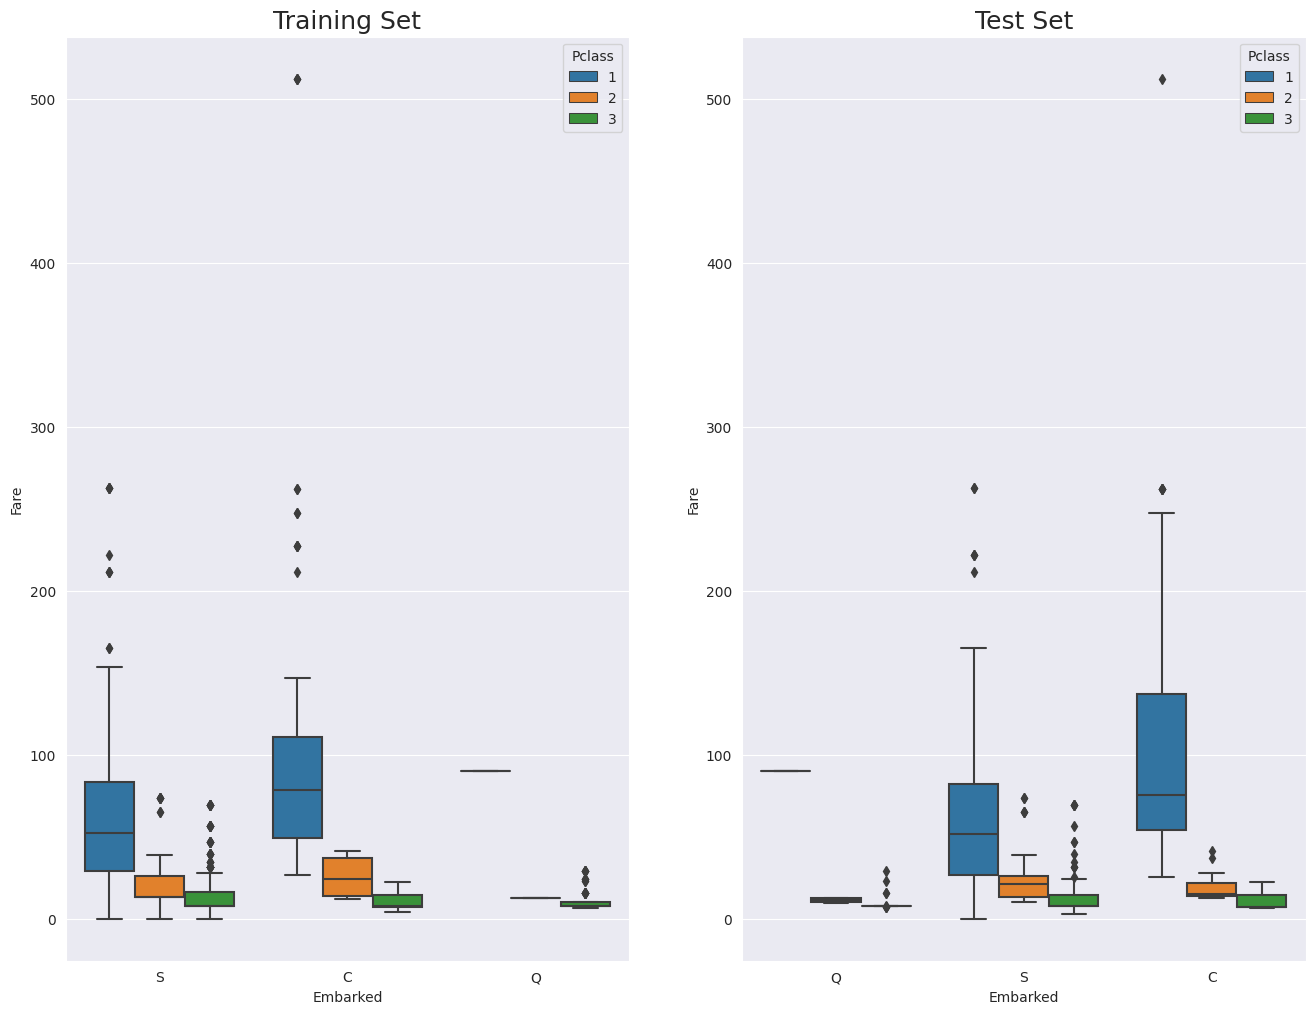

In [23]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16, 12), ncols=2)
ax1 = sns.boxplot(x='Embarked', y='Fare', hue='Pclass',
                  data=train, ax=ax[0])
ax2 = sns.boxplot(x='Embarked', y='Fare', hue='Pclass',
                  data=test, ax=ax[1]);
ax1.set_title('Training Set', fontsize=18)
ax2.set_title('Test Set', fontsize=18)

fig.show()

In both training set and test set, the average fare closest to $80 are in the C Embarked values where pclass is 1. Let's fill in the missing values as "C".

In [24]:
# Replacing the null values in th Embarked column with the mode
train.Embarked.fillna("C", inplace=True)

**Cabin Features**

In [25]:
print("Train Cabin missing: " + str(train.Cabin.isnull().sum()/len(train.Cabin)))
print("Test Cabin missing: " + str(test.Cabin.isnull().sum()/len(test.Cabin)))

Train Cabin missing: 0.7710437710437711
Test Cabin missing: 0.7822966507177034


Approximately 77% of Cabin features are missing in the training data and 78% missing on the test data. We have two choices:
*   Getting rid of the whole feature.
*   Figure out an appropriate wat to put them in use. For example, we may say passengers with a cabin record had a higher socio-economic-status then others. We may also say passengers with a cabin record were more likely to be taken into consideration when loading into the boat.



In [26]:
# We combine the train and test data, assign the null values as "N"
## Concat train and test into variable "all_data"
survivers = train.Survived

train.drop(['Survived'], axis=1, inplace=True)

all_data = pd.concat([train, test], ignore_index=False)

# Assign all the null values to "N"
all_data.Cabin.fillna("N", inplace=True)

 It seems like there are some passengers that had booked multiple cabin rooms in their name. This is because many of them travelled with family. However, they all seem to book under the same letter followed by different numbers. It seems like there is a significance with the letters rather than the numbers. Therefore, we can group these cabins according to the letter of the cabin name.

In [27]:
all_data.Cabin = [i[0] for i in all_data.Cabin]

In [28]:
# Checking value_counts of cabin features
percent_value_counts(all_data, 'Cabin')

,Total,Percent
N,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


We still haven't done any effective work to replace the null values. We can use the average of the fare column We can use pythons groupby function to get the mean fare of each cabin letter.

In [29]:
all_data.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

These means can help us determine the unknown cabins if we compare each unknown cabin rows with the given means above.

In [30]:
# Write a function that we can give cabin names based on means
def cabin_estimator(i):
  # Grouping cabin features by first letter
  a = 0
  if i<16:
    a = "G"
  elif i>16 and i<27:
    a = "F"
  elif i>27 and i<38:
    a = "T"
  elif i>38 and i<47:
    a = "A"
  elif i>47 and i<53:
    a = "E"
  elif i>53 and i<54:
    a = "D"
  elif i>54 and i<116:
    a = 'C'
  else:
    a = "B"
  return a

Applying cabin_estimator function in each unknown cabins (cabin with null values). Once done, we'll seperate our train and test to continue towards our model.

In [31]:
with_N = all_data[all_data.Cabin == "N"]
without_N = all_data[all_data.Cabin != "N"]

In [32]:
# Applying cabin_estimator function
with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x))

# getting back train
all_data = pd.concat([with_N, without_N], axis=0)

# PassengerId helps us seperate train and test
all_data.sort_values(by='PassengerId', inplace=True)

# Seperating train and test from all_data
train = all_data[:891]

test = all_data[891:]

# adding saved target variable with train
train['Survived'] = survivers

<ipython-input-32-cf673db27d80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x))
<ipython-input-32-cf673db27d80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Survived'] = survivers


**Fare Feature**

In [33]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


 For the sake of learning and practicing, we will try something else. We can take the average of the values where *Pclass* is *3*, *Sex* is *male* and *Embarked* is *S*

In [34]:
missing_value = test[(test.Pclass == 3) &
                     (test.Embarked == "S") &
                     (test.Sex == 'male')].Fare.mean()
# replace the test.Fare null values with test.Fare mean
test.Fare.fillna(missing_value, inplace=True)

<ipython-input-34-cab712326054>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Fare.fillna(missing_value, inplace=True)


**Age Feature**

We know that the feature "Age" is the one with most missing values, let's see it in terms of percentage.

In [35]:
print("Train age missing value: ", str((train.Age.isnull().sum()/len(train))*100)+str("%"))
print("Test age missing value: ", str((test.Age.isnull().sum()/len(test))*100)+str("%"))

Train age missing value:  19.865319865319865%
Test age missing value:  20.574162679425836%


20% data in the Age column is missing in both train and test dataset. The age variable seems to be promising for determining survival rate. Therefore, It would be unwise to replace the missing values with median, mean or mode. We will use machine learning model Random Forest Regressor to impute missing value instead of Null value. We will keep the age column unchanged for now and work on that in the feature engineering section.

# **Part 3. Visualization and Feature Relations**



 Let us create some assumptions about how the relations may turn-out among features.

** Assumptions:**

Gender: More female survived than male
Pclass: Higher socio-economic status passenger survived more than others.
Age: Younger passenger survived more than other passengers.
Fare: Passenger with higher fare survived more that other passengers. This can be quite correlated with Pclass.

Now, let's see how the features are related to each other by creating some visualizations.


**3a. Gender and Survived**

Text(0.5, 0, 'Sex')

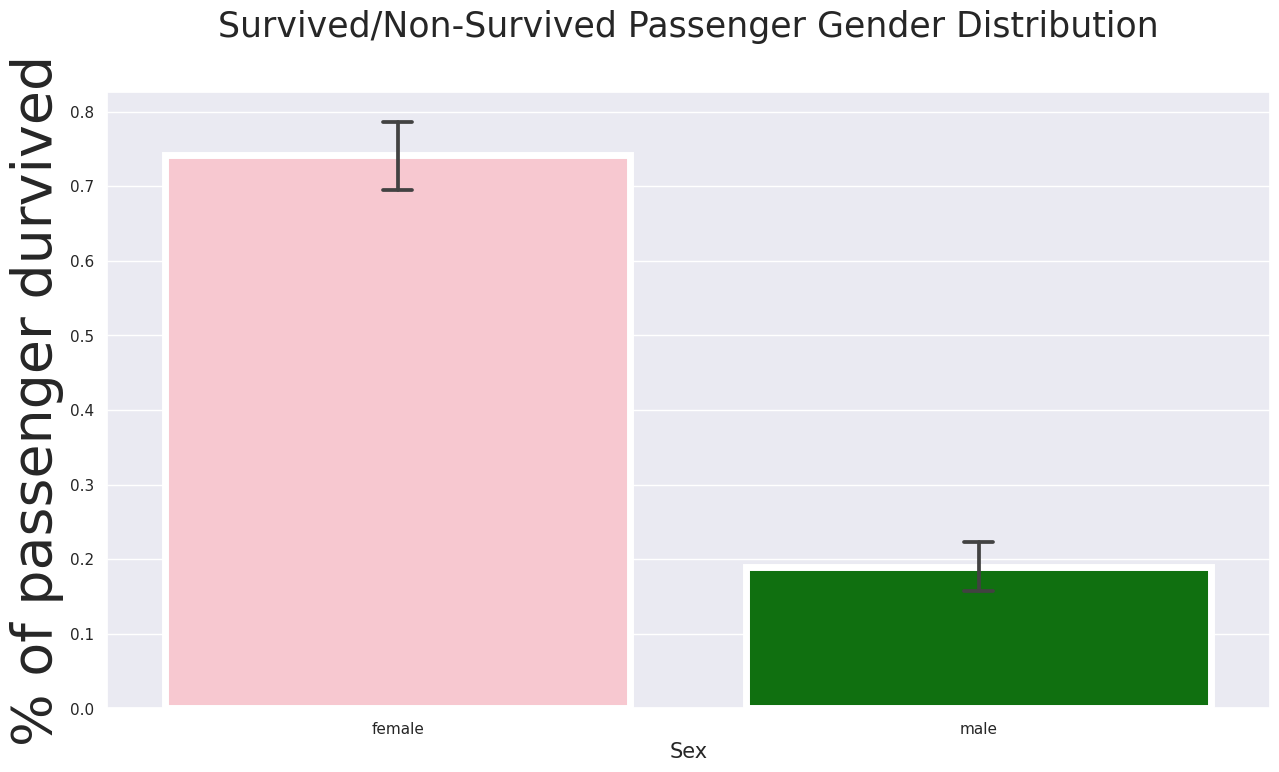

In [36]:
pal = {'male':'green','female':'Pink'}
sns.set(style='darkgrid')
plt.subplots(figsize=(15,8))
ax = sns.barplot(x='Sex', y='Survived', data=train, palette=pal, linewidth=5,
                 order=['female', 'male'], capsize=.05)
plt.title('Survived/Non-Survived Passenger Gender Distribution',
          fontsize=25, loc='center', pad=40)
plt.ylabel('% of passenger durvived', fontsize=40)
plt.xlabel('Sex', fontsize=15)

This bar plot above shows the distribution of female and male survived. The x_label represents Sex feature while the y_label represents the % of passenger survived. This bar plot shows that ~74% female passenger survived while only ~19% male passenger survived.

<function matplotlib.pyplot.show(close=None, block=None)>

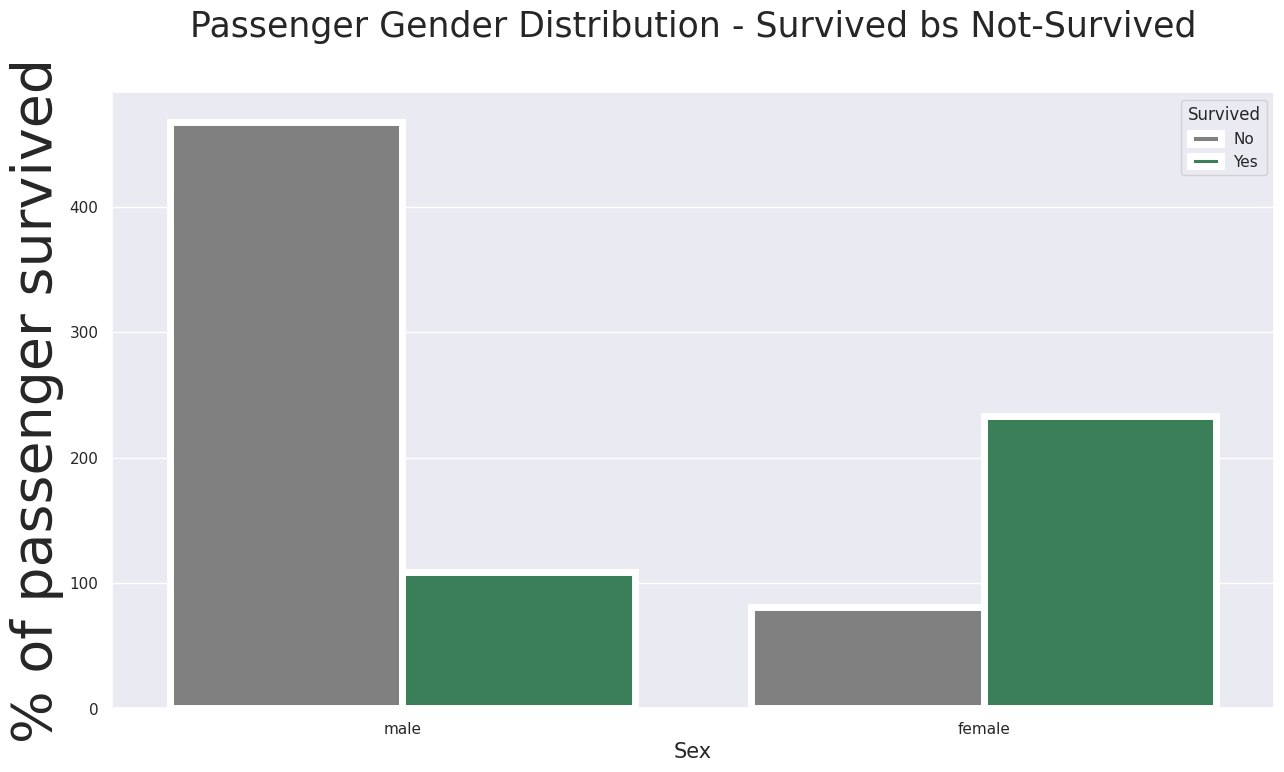

In [37]:
pal = {1:'seagreen',0:'Grey'}
sns.set(style='darkgrid')
plt.subplots(figsize=(15,8))
ax = sns.countplot(x='Sex', hue='Survived', data=train, palette=pal, linewidth=5)
plt.title('Passenger Gender Distribution - Survived bs Not-Survived',
          fontsize=25, loc='center', pad=40)
plt.ylabel('% of passenger survived', fontsize=40)
plt.xlabel('Sex', fontsize=15)

# Fixing legend
leg = ax.get_legend()
leg.set_title('Survived')
legs = leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')
plt.show

Among all the females ~ 230 survived and ~ 70 did not survive. While among male passengers ~110 survived and ~480 did not survive.
*   As we suspected, female passengers have survived at a much better rate than male passengers.
*   It seems about right since females and children were the priority.



**3b. Pclass and Survived**

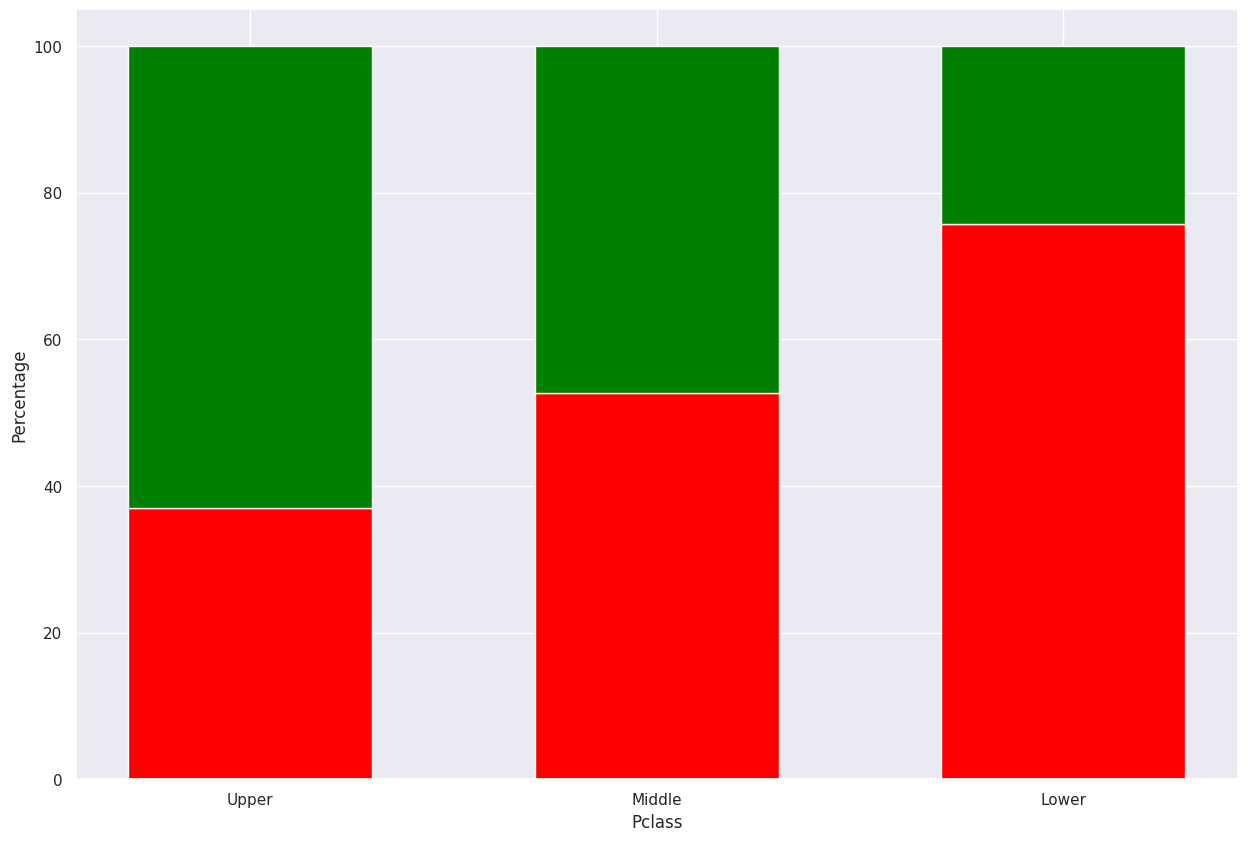

In [38]:
temp = train[[
    'Pclass','Survived','PassengerId']].groupby([
        'Pclass','Survived']).count().reset_index()
temp_df = pd.pivot_table(temp, values='PassengerId',
                         index='Pclass', columns='Survived')
names = ['No','Yes']
temp_df.columns = names
r = [0,1,2]
totals = [i+j for i,j in zip(temp_df['No'], temp_df['Yes'])]
No_s = [i / j * 100 for i,j in zip(temp_df['No'], totals)]
Yes_s = [i / j * 100 for i,j in zip(temp_df['Yes'], totals)]

# Plotting
plt.subplots(figsize=(15,10))
barWidth = 0.60
names = ('Upper','Middle','Lower')

# Create Green bars
plt.bar(r, No_s, color='Red', edgecolor='White', width=barWidth)

# Create Orange bars
plt.bar(r, Yes_s, bottom=No_s , color='Green',
        edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, names)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

plt.show()

([<matplotlib.axis.XTick at 0x7857a1e3db70>,
 [Text(0, 0, 'Upper'), Text(1, 0, 'Middle'), Text(2, 0, 'Lower')])

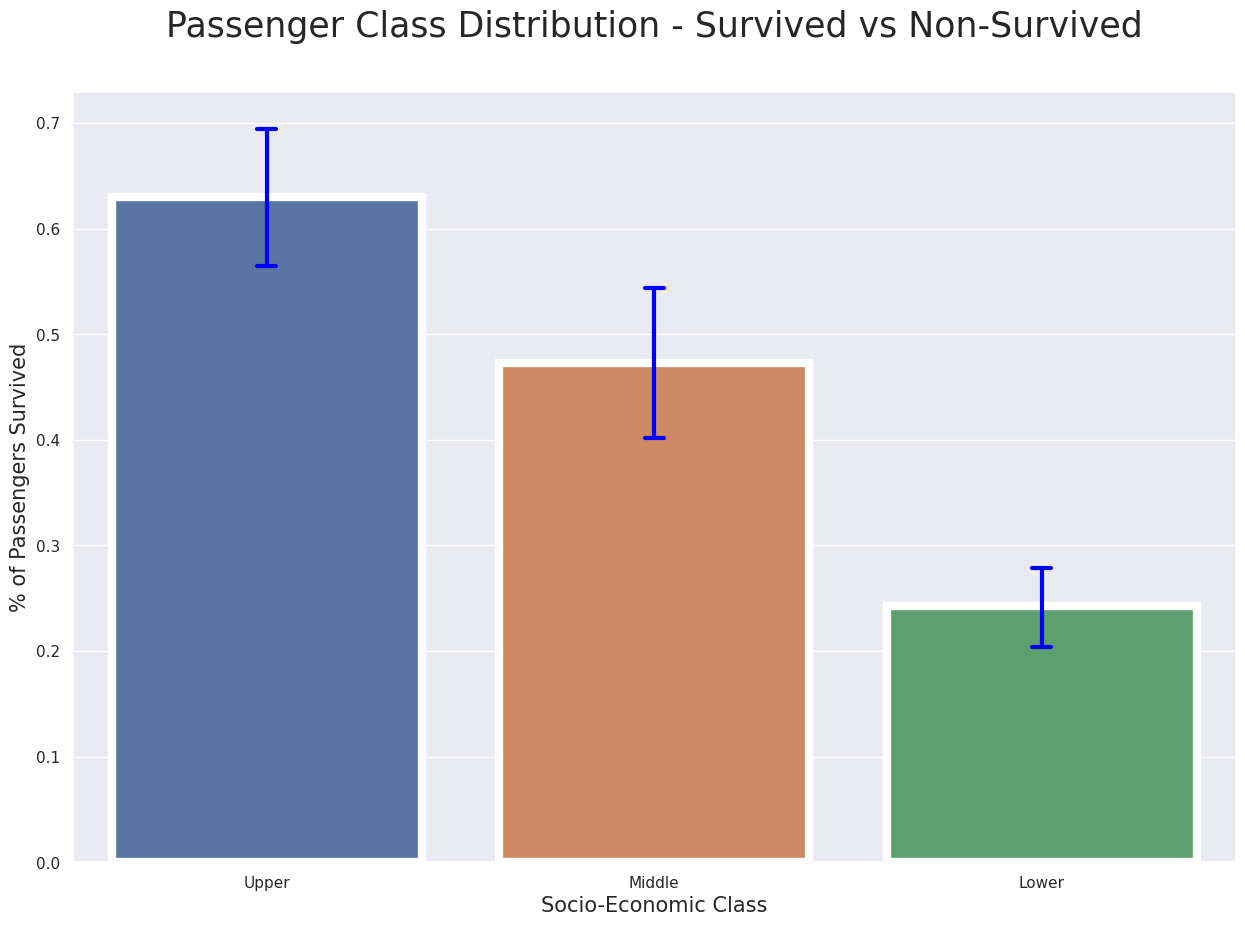

In [39]:
plt.subplots(figsize=(15,10))
sns.barplot(x='Pclass',y='Survived', data=train,
            linewidth=6, capsize=.05, errcolor='blue', errwidth=3)
plt.title('Passenger Class Distribution - Survived vs Non-Survived',
          fontsize=25, pad=40)
plt.xlabel('Socio-Economic Class', fontsize=15)
plt.ylabel('% of Passengers Survived', fontsize=15)
names = ['Upper','Middle','Lower']

# val = sorted(train.Pclass.unique())
# Temporary value for the labeling
val = [0,1,2]
plt.xticks(val, names)



*   ~63% first class passengers survived the titanic tragedy while...
*   ~48% second class passengers survived,
*   and ~24% third class passengers survived.


<ipython-input-40-fd98f2d9d57b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train.loc[(train['Survived'] == 1), 'Pclass'],


([<matplotlib.axis.XTick at 0x7857a1eb7ca0>,
 [Text(1, 0, 'Upper'), Text(2, 0, 'Middle'), Text(3, 0, 'Lower')])

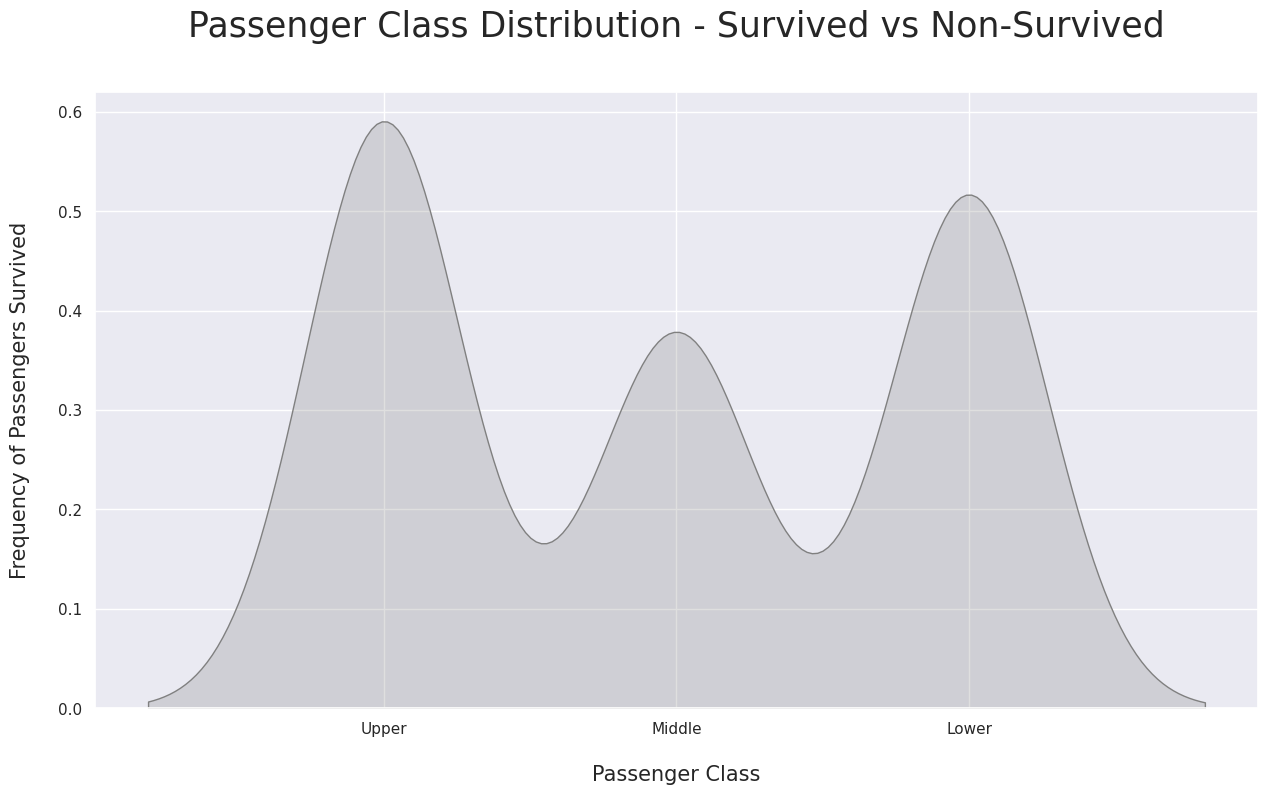

In [40]:
# Kernal Density Plot
fig = plt.figure(figsize=(15,8))
ax = sns.kdeplot(train.loc[(train['Survived'] == 1), 'Pclass'],
                 color='grey',
                 shade=True,
                 label='not survived')
plt.title('Passenger Class Distribution - Survived vs Non-Survived',
          fontsize=25, pad=40)
plt.ylabel('Frequency of Passengers Survived', fontsize=15, labelpad=20)
plt.xlabel('Passenger Class', fontsize=15, labelpad=20)

# Coverting xticks
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels)

the lower class passengers have survived more than second-class passengers. It is true since there were a lot more third-class passengers than first and second.

**3c. Fare and Survived**

<ipython-input-41-8d5b0f6c46b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train.loc[(train['Survived'] == 0), 'Fare'], color='gray',
<ipython-input-41-8d5b0f6c46b1>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train.loc[(train['Survived'] == 1), 'Fare'], color='g',


Text(0, 0.5, 'Fare')

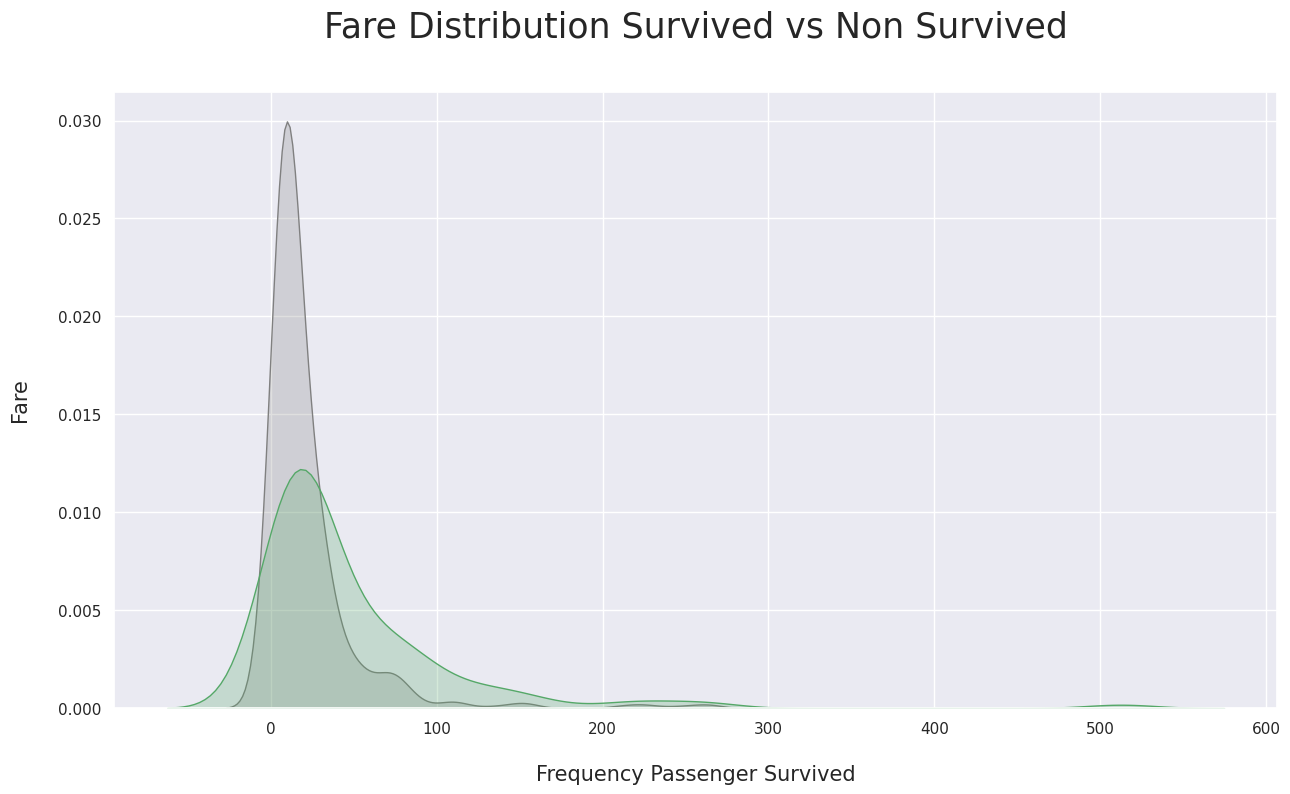

In [41]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8))
ax = sns.kdeplot(train.loc[(train['Survived'] == 0), 'Fare'], color='gray',
                 shade=True, label='not survived')
ax = sns.kdeplot(train.loc[(train['Survived'] == 1), 'Fare'], color='g',
                 shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize=25, pad=40)
plt.xlabel('Frequency Passenger Survived', fontsize=15, labelpad=20)
plt.ylabel('Fare', fontsize=15, labelpad=20)

*   The spike in the plot under 100 dollar represents that a lot of passengers who bought the ticket within that range did not survive.
*When fare is approximately more than 280 dollars, there is no gray shade which means, either everyone passed that fare point survived or maybe there is an outlier that clouds our judgment. Let's check...



In [42]:
train[train.Fare > 280]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B,C,1
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C,1
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C,1


As we assumed, it looks like an outlier with a fare of $512. We sure can delete this point. However, we will keep it for now.

**3d. Age and Survived**

<ipython-input-43-114269d2dc3a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train.loc[(train['Survived'] == 0), 'Age'], color='gray',
<ipython-input-43-114269d2dc3a>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train.loc[(train['Survived'] == 1), 'Age'], color='g',


Text(0, 0.5, 'Frequency')

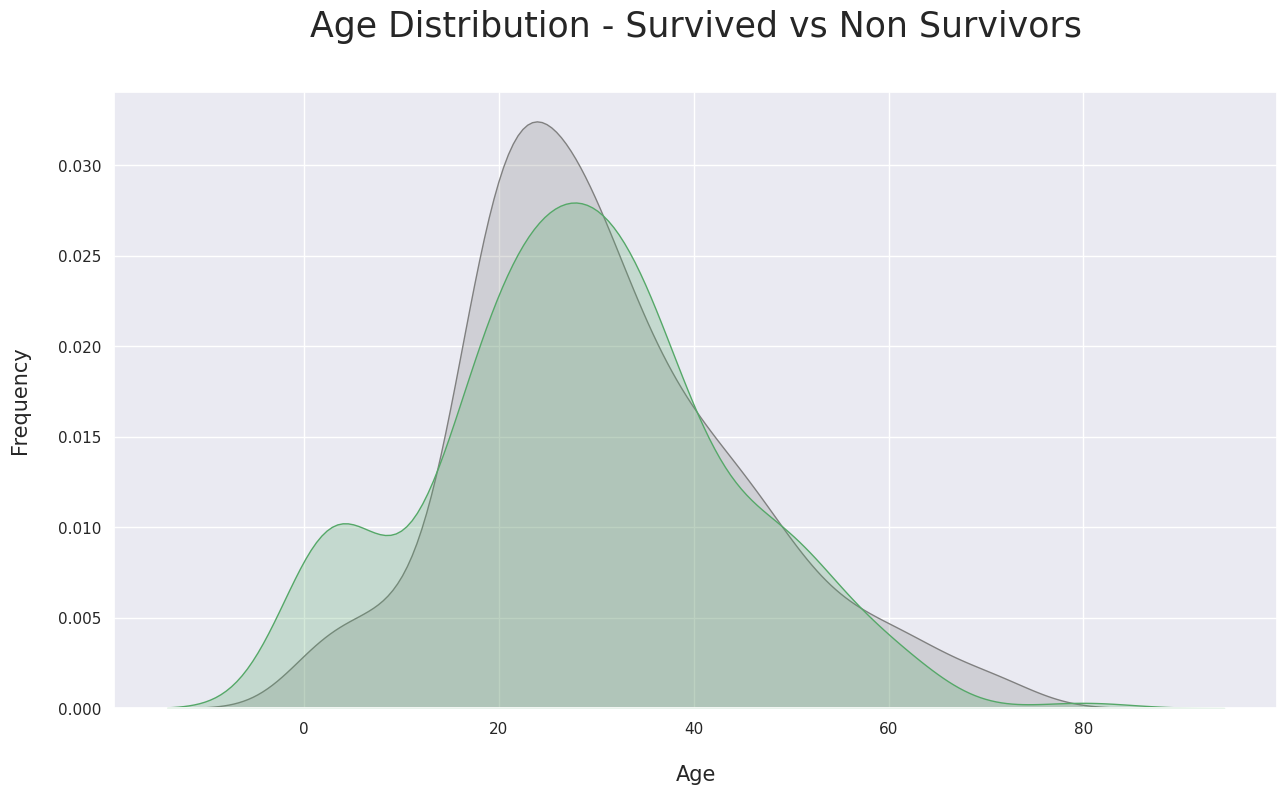

In [43]:
# Kernel Density Plot
fig = plt.figure(figsize=(15, 8))
ax = sns.kdeplot(train.loc[(train['Survived'] == 0), 'Age'], color='gray',
                 shade=True, label='not survived')
ax = sns.kdeplot(train.loc[(train['Survived'] == 1), 'Age'], color='g',
                           shade=True, label='survived')
plt.title('Age Distribution - Survived vs Non Survivors', fontsize=25, pad=40)
plt.xlabel('Age', fontsize=15, labelpad=20)
plt.ylabel('Frequency', fontsize=15, labelpad=20)

The very left part of the distribution may hint on the possibility that children and infants were the priority.

**3e. Combined Feature Relations**

In this section, we are going to discover more than two feature relations in a single graph.

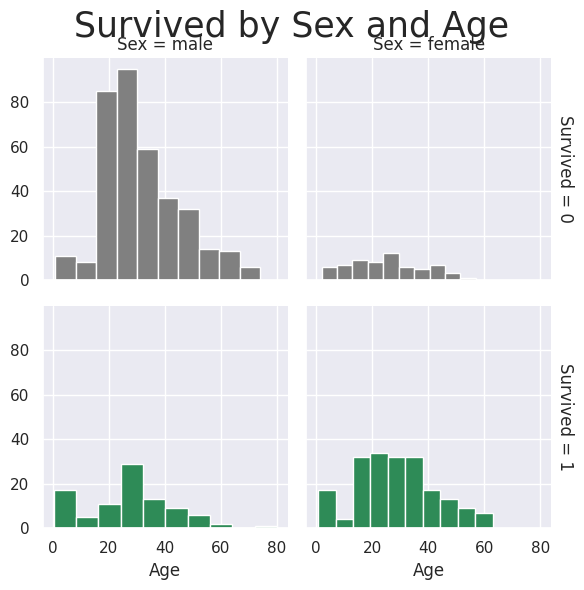

In [44]:
pal = {1: 'seagreen', 0:'gray'}
g = sns.FacetGrid(train, col='Sex', row='Survived',
                  margin_titles=True, hue='Survived', palette=pal)
g = g.map(plt.hist, 'Age', edgecolor='white')
g.fig.suptitle('Survived by Sex and Age', size=25)
plt.subplots_adjust(top=0.90)

From the chart in section 3a we have a intuition that female passengers had better prority than males during the tragedy. However, from this facet grid, we can also understand which age range groups survived more than others or were not so lucky

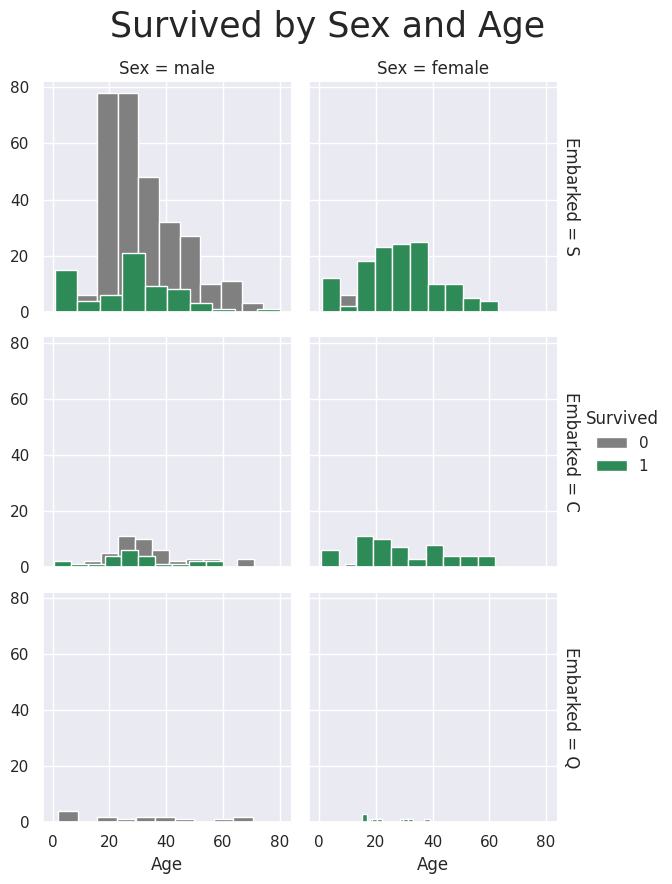

In [45]:
g = sns.FacetGrid(train, col='Sex', row='Embarked', margin_titles=True,
                  hue='Survived', palette=pal)
g = g.map(plt.hist, 'Age', edgecolor='white').add_legend()
g.fig.suptitle('Survived by Sex and Age', size=25)
plt.subplots_adjust(top=0.90)

This is another compelling facet grid illustrating four features relationship at once. They are Embarked, Age, Survived & Sex.
*   The color illustrates passengers survival status (green represents survived, gray represents not survived)
*   The column represents Sex (left being male, right being female)
*   The row representd Embarked (from top to bottom: S, C, Q)

Some insights that arent so obvious comming from the data:
*   Most passengers seem to be boarded on Southhampton(S)
*   More than 60% of the passengers died boarded on Southhampton
*   More than 60% of the passengers lived boarded on Cherbourg(C)
*   Almost every male that boarded on Queenstown(Q) did not survive
*   There were very few females boarded on Queenstown, however, most survived





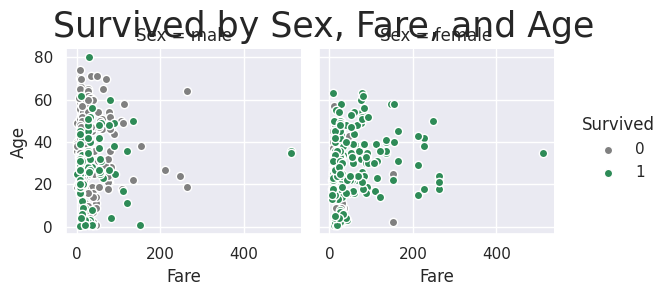

In [46]:
g = sns.FacetGrid(train, col='Sex', margin_titles=True,
                  hue='Survived', palette=pal)
g = g.map(plt.scatter, 'Fare', 'Age', edgecolor='white').add_legend()
g.fig.suptitle('Survived by Sex, Fare, and Age', size=25)
plt.subplots_adjust(top=0.85)

*   The grid above demonstrates the three outliers with Fare of over $500. We should be confident that the outliters should be deleted.

*   Most of the passengers were with in the Fare range of $100



In [47]:
#sns.__version__

In [48]:
# Dropping the three outliers where Fare is over $500
train = train[train.Fare < 500]

# Factor plot
# sns.factorplot(data=train, x='Parch', y='Survived', kind='point', size=8)
# plt.title('Factorplot of Parents/Children Survived', fontsize=25)
# plt.subplots_adjust(top=0.85)



In [49]:
# Placing 0 for female and 1 for male in the 'Sex' column
train['Sex'] = train.Sex.apply(lambda x: 0 if x == 'female' else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == 'female' else 1 )

<ipython-input-49-30efd7368a25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Sex'] = train.Sex.apply(lambda x: 0 if x == 'female' else 1)
<ipython-input-49-30efd7368a25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Sex'] = test.Sex.apply(lambda x: 0 if x == 'female' else 1 )


# **Part 4: Statistical Overview**

In [50]:
# Train info
train.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,888.000000,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,2.313063,0.647523,29.675345,0.524775,0.381757,30.582164,0.381757
std,257.405474,0.834007,0.478011,14.552495,1.104186,0.806949,41.176366,0.486091
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800,0.000000
50%,445.500000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,667.250000,3.000000,1.000000,38.000000,1.000000,0.000000,30.771850,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000,1.000000


In [51]:
train.describe(include =['O'])

,Name,Ticket,Cabin,Embarked
count,888,888,888,888
unique,888,680,8,3
top,"Braund, Mr. Owen Harris",347082,G,S
freq,1,7,464,644


In [52]:
# Overview (Survived vs Non Survived)
survived_summary = train.groupby('Survived')
survived_summary.mean().reset_index()

<ipython-input-52-c4b93e6df41d>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  survived_summary.mean().reset_index()


,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,447.016393,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1,443.353982,1.958702,0.315634,28.270627,0.477876,0.466077,44.289799


In [53]:
survived_summary = train.groupby('Sex')
survived_summary.mean().reset_index()

<ipython-input-53-7d37003e4eae>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  survived_summary.mean().reset_index()


,Sex,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,0,431.578275,2.162939,27.888462,0.696486,0.651757,42.985091,0.741214
1,1,453.260870,2.394783,30.705477,0.431304,0.234783,23.830658,0.186087


In [54]:
survived_summary = train.groupby('Pclass')
survived_summary.mean().reset_index()

<ipython-input-54-4c322991ac67>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  survived_summary.mean().reset_index()


,Pclass,PassengerId,Sex,Age,SibSp,Parch,Fare,Survived
0,1,460.225352,0.563380,38.280984,0.422535,0.356808,78.124061,0.624413
1,2,445.956522,0.586957,29.877630,0.402174,0.380435,20.662183,0.472826
2,3,439.154786,0.706721,25.140620,0.615071,0.393075,13.675550,0.242363


*   We are dealing with 891 rows and 9 columns in this train data set
*   38% of passengers survived during this tragedy
*   ~74% of female passengers survived while only ~19% males survived
*   ~63% first class passengers survived, ~24% lower class passengers survived



**4a. Correlation Matrix and Heatmap**

Correlations

In [55]:
pd.DataFrame(abs(train.corr()['Survived']).sort_values(ascending=False))

<ipython-input-55-f433bdc6d5fa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(abs(train.corr()['Survived']).sort_values(ascending=False))


,Survived
Survived,1.000000
Sex,0.545899
Pclass,0.334068
Fare,0.261742
Parch,0.082157
Age,0.079472
SibSp,0.033395
PassengerId,0.006916


Sex is the most important correlated feature with Survived(dependent variable) feature followed by Pclass

In [56]:
# most important variable
corr = train.corr()**2
corr.Survived.sort_values(ascending=False)

<ipython-input-56-af8f56fd5925>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()**2


Survived       1.000000
Sex            0.298006
Pclass         0.111601
Fare           0.068509
Parch          0.006750
Age            0.006316
SibSp          0.001115
PassengerId    0.000048
Name: Survived, dtype: float64

Squaring the correlation feature not only gives on positive correlations but also amplifies the relationships.

<ipython-input-57-6f5e3a38528a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(train.corr(), dtype=np.bool)
<ipython-input-57-6f5e3a38528a>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(train.corr(), dtype=np.bool)
<ipython-input-57-6f5e3a38528a>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence th

Text(0.5, 1.03, 'Correlation Among Features')

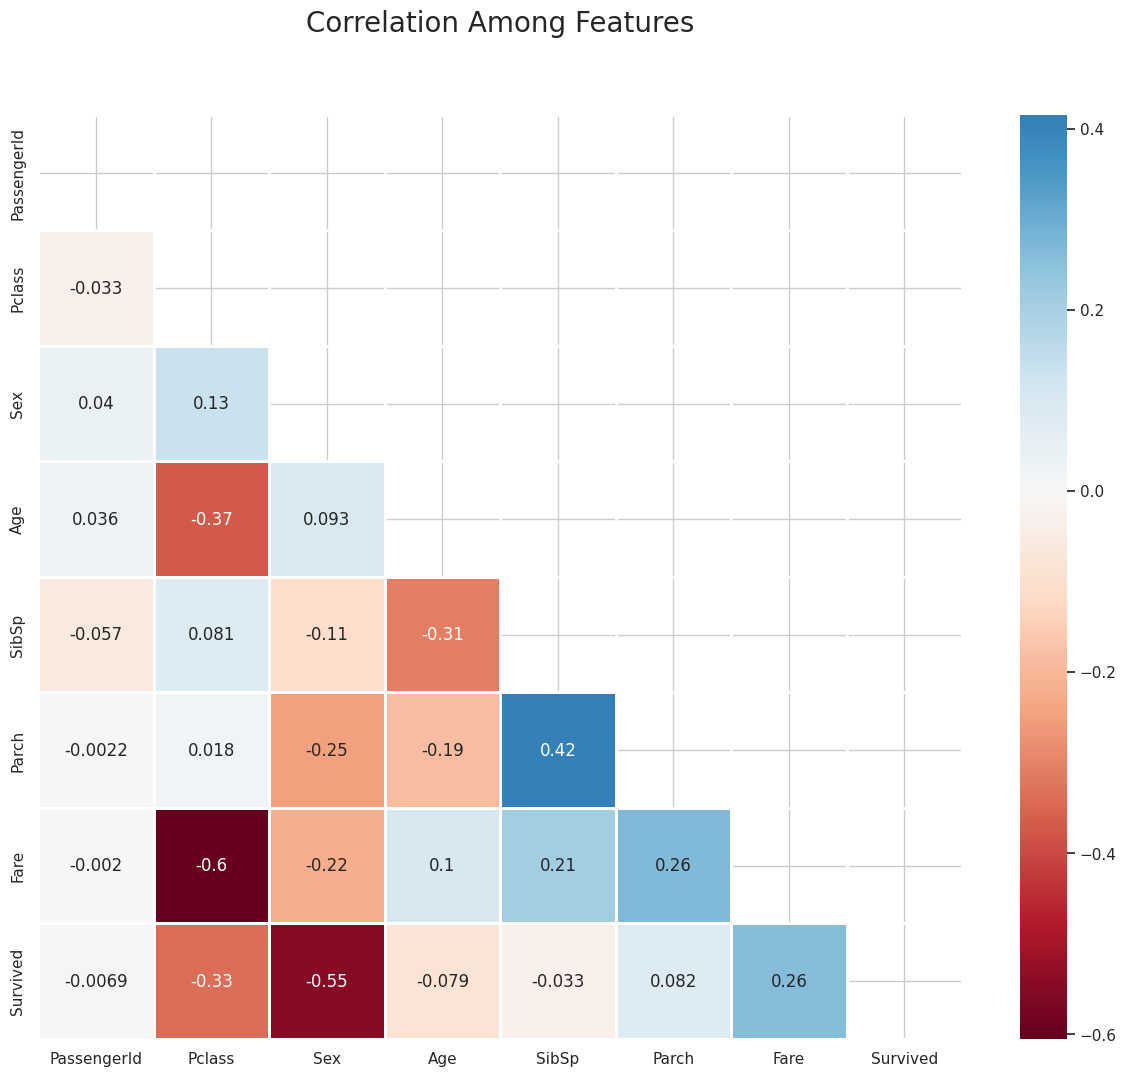

In [57]:
# Heatmap the visualize the correlation between features.
# Generate a mask for the upper triangle
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize=(15,12))
sns.heatmap(train.corr(), annot=True, mask=mask, cmap='RdBu',
            linewidths=.9, linecolor='white', fmt='.2g',
            center=0, square=True)
plt.title('Correlation Among Features', y=1.03, fontsize=20, pad=40)

**Positive Correlation Features:**
*   Fare and Survived: 0.26

**Negative Correlation Features:**
*   Fare and Pclass: -0.6
*   Sex and Survived: -0.55
*   Pclass and Survived: -0.33

We have found some moderately strong relationships between different features. There is a definite positive correlation between Fare and Survived rated. ***This relationship reveals that the passenger who paid more money for their ticket were more likely to survive.*** This theory aligns with one other correlation which is the correlation between Fare and Pclass(-0.6). This relationship can be explained by saying that ***first class passenger(1) paid more for fare then second class passenger(2), similarly second class passenger paid more than the third class passenger(3)***. This theory can also be supported by mentioning another Pclass correlation with our dependent variable, Survived. The correlation between Pclass and Survived is -0.33. This can also be explained by saying that first class passenger had a better chance of surviving than the second or the third and so on.


The most significant correlation with our dependent variable is the Sex variable, which is the info on whether the passenger was male or female. This negative correlation with a magnitude of -0.54 which points towards some undeniable insights. Let's do some statistics to see how statistically significant this correlation is.

**4b. Statistical Test for Correlation**

1. Formulate a well-developed research problem or question: The hypothesis test usually starts with a concrete and well-developed researched problem. We need to ask the right question that can be answered using statistical analysis.
2. The null hypothesis( H0
 ) and Alternating hypothesis( H1
 ):
  *  The null hypothesis( H0
 ) is something that is assumed to be true. It is the status quo. In a null hypothesis, the observations are the result of pure chance. When we set out to experiment, we form the null hypothesis by saying that there is no difference between the means of the control group and the experimental group.
  *  An Alternative hypothesis( HA
 ) is a claim and the opposite of the null hypothesis. It is going against the status quo. In an alternative theory, the observations show a real effect combined with a component of chance variation.
3. Determine the test statistic: test statistic can be used to assess the truth of the null hypothesis. Depending on the STD we either use a t-statistic or z-statistic. In addidtion to that, we want to identify whether the test is a one-tailed or two-tailed test.
4. Specify a **significance level** and a **confidence level**: The significance level(α) is the probability of rejecting a null hypothesis when it is true. In other words, we are comfortable/confident with rejecting the null hypothesis a significant amount of times even though it is true. This considerable amount is our Significant level. In addition to that, **Significance level in one minus our Confidence interval.** For example:
if we say our significance level is 5%, then our confidence interval would be (1 - 0.05) = 0.95 or 95%.
5. Compute T-Statistics/Z-Statistics. This depends on a one-sample or two-sample test.
6. Compute P-value: P-value is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis is correct.
7. Describe the result and compare the p-value with the significance value(α): If p<= α, then the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.  However if the p>  α
 , we say that, we fail to reject the null hypothesis. Even though this sentence is grammatically wrong, it is logically right. We never accept the null hypothesis just because we are doing the statistical test with sample data points.


**Hypothesis testing for Titanic**
Formulating a well-developed research question:
*   Is there a significant difference in the mean sex between the passenger who survived and passenger who did not survive?.
*   Is there a substantial difference in the survival rate between the male and female passengers?


The Null Hypothesis and The Alternative Hypothesis:

Here our dependent variable or target variable is Survived. Therefore, we say

Null Hypothesis( H0
 ): There is no difference in the survival rate between the male and female passengers. or the mean difference between male and female passenger in the survival rate is zero.

Alternative Hypothesis( HA
 ): There is a difference in the survival rate between the male and female passengers. or the mean difference in the survival rate between male and female is not zero.

Determine the test statistics:
This will be a two-tailed test since the difference between male and female passenger in the survival rate could be higher or lower than 0. Since we do not know the standard deviation( σ
 ) and n is small, we will use the t-distribution.

 Specify the significance level:
 significance level(a) = 0.05, confidence interval 95%

In [58]:
# Computing T-statistics and P-value w/ random sample
male_mean = train[train['Sex'] == 1].Survived.mean()
female_mean = train[train['Sex'] == 0].Survived.mean()
print('Male Survival Mean: ', (male_mean))
print('Female Survival Mean: ',(female_mean))

print('The Mean Difference Between Male and Female Survibal Rate: ',
 (female_mean - male_mean))


Male Survival Mean:  0.18608695652173912
Female Survival Mean:  0.7412140575079872
The Mean Difference Between Male and Female Survibal Rate:  0.5551271009862481


Now, we have to understand that those two means are not the population mean ( μ¯
 ). The population mean is a statistical term statistician uses to indicate the actual average of the entire group. The group can be any gathering of multiple numbers such as animal, human, plants, money, stocks. For example, To find the age population mean of Bulgaria; we will have to account for every single person's age and take their age. Which is almost impossible and if we were to go that route; there is no point of doing statistics in the first place. Therefore we approach this problem using sample sets. The idea of using sample set is that; if we take multiple samples of the same population and take the mean of them and put them in a distribution; eventually the distribution start to look more like a normal distribution. The more samples we take and the more sample means will be added and, the closer the normal distribution will reach towards population mean. This is where Central limit theory comes from. We will go more in depth of this topic later on.

 We were given part of the data to train our machine learning models, and the other part of the data was held back for testing. Therefore, It is impossible for us at this point to know the population means of survival for male and females. Situation like this calls for a statistical approach. We will use the sampling distribution approach to do the test. let's take 50 random sample of male and female from our train data.

In [59]:
# Seperating Male and Female Database
male = train[train['Sex'] == 1]
female =train[train['Sex'] == 0]

# Empty List for storing means
m_mean_samples = []
f_mean_samples = []

for i in range(50):
  m_mean_samples.append(np.mean(random.sample(list(male['Survived']), 50)))
  f_mean_samples.append(np.mean(random.sample(list(female['Survived']), 50)))

print(f'Male Sample Mean:  {round(np.mean(m_mean_samples), 2)}')
print(f'Female Sample Mean:  {round(np.mean(f_mean_samples), 2)}')
print(f'Difference Between Male and Female Samples Mean:  {round(np.mean(f_mean_samples)-np.mean(m_mean_samples), 2)}')

Male Sample Mean:  0.19
Female Sample Mean:  0.75
Difference Between Male and Female Samples Mean:  0.56


H0: male mean is greater or equal to female mean

H1: male mean is less than female mean

According to the samples our male samples ( x¯m
 ) and female samples( x¯f
 ) mean measured difference is ~ 0.55(statistically this is called the point estimate of the male population mean and female population mean). keeping in mind that...
*   We randomly selected 50 people to be in the male group and 50 people to be in the female group
*   We know our sample is selected from a broader population which is the **training set**
*   We know we could have ended up with a different random sample of males and females





With all three points above in mind, how confident are we that, the measured difference is real or statistically significant? we can perform a **t-test** to evaluate that. When we perform a t-test we are usually trying to find out an evidence of **significant difference between population mean with hypothesized mean(1 sample t-test)** or in our case** difference between two population means(2 sample t-test)**.

The t-statistics is the measure of a degree to which our groups **differ** standardized by the variance of our measurements. In order words, it is basically **the measure of signal over noise**.

According to the samples our male samples ( x¯m
 ) and female samples( x¯f
 ) mean measured difference is ~ 0.55(statistically this is called the point estimate of the male population mean and female population mean). keeping in mind that...

We randomly select 50 people to be in the male group and 50 people to be in the female group.
We know our sample is selected from a broader population(trainning set).
We know we could have totally ended up with a different random sample of males and females.
With all three points above in mind, how confident are we that, the measured difference is real or statistically significant? we can perform a t-test to evaluate that. When we perform a t-test we are usually trying to find out an evidence of significant difference between population mean with hypothesized mean(1 sample t-test) or in our case difference between two population means(2 sample t-test).

The t-statistics is the measure of a degree to which our groups differ standardized by the variance of our measurements. In order words, it is basically the measure of signal over noise. Let us describe the previous sentence a bit more for clarification. I am going to use this post as reference to describe the t-statistics here.

Calculating the t-statistics:

t=x¯−μSn√
*   x¯
  is the sample mean.
*   μ
  is the hypothesized mean.
*   S is the standard deviation.
*   n is the sample size.

Now, the denominator of this fraction  (x¯−μ)
  is basically the strength of the signal. where we calculate the difference between hypothesized mean and sample mean. If the mean difference is higher, then the signal is stronger.

  We will use scipy.stats to find the t-statistics.

Compare P-value with  α

It looks like the p-value is very small compared to our significance level( α
 )of 0.05. Our observation sample is statistically significant. Therefore, our null hypothesis is ruled out, and our alternative hypothesis is valid, which is "There is a significant difference in the survival rate between the male and female passengers."

In [60]:
from scipy.stats.stats import ttest_ind_from_stats
from scipy import stats

# t, p = stats.ttest_ind(a=m_mean_samples, b=f_mean_samples, equal_var=True)
# print(f'T-Value is: {t}, and P-value is: {p}')





<ipython-input-60-028655d4c896>:1: DeprecationWarning: Please use `ttest_ind_from_stats` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import ttest_ind_from_stats


# **Part 5: Feature Engineering**

It is important to remember that we will create new features in such ways that will not cause multicollinearity(when there is a relationship among independent variables) to occur.

**name_length**

Creating a new feature "name_length" that will take the count of letters of each name

In [61]:
'''
> .map is a python built-in function: takes a function and returns an iterable
list/tuple or in this case series.

>.map function can also be used like map(function) eg.. map(name_length_group)
or
map(function, iterable[list, tuple]). eg.. map(name_length_group, train[feature])
'''

# Create a new column with 'a'
train['name_length'] = [len(i) for i in train.Name]
test['name_length'] = [len(i) for i in test.Name]

def name_length_group(size):
  a = ''
  if (size<= 20):
    a = 'Short'
  elif (size<=35):
    a = 'Medium'
  elif (size<=45):
    a = 'Good'
  else:
    a = 'Long'
  return a

train['nLength_group'] = train['name_length'].map(name_length_group)
test['nLength_group'] = test['name_length'].map(name_length_group)

<ipython-input-61-cd9812a6ac7b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['name_length'] = [len(i) for i in train.Name]
<ipython-input-61-cd9812a6ac7b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['name_length'] = [len(i) for i in test.Name]
<ipython-input-61-cd9812a6ac7b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

**Title**

Getting the Title of each name as new feature

In [62]:
# Get the title from the name
train['title'] = [i.split('.')[0] for i in train.Name]
train['title'] = [i.split(',')[1] for i in train.title]

# Whenever we split like that, there is a good change that we will end up with
# while space around our string values. Let's check that.

print(train.title.unique())

[' Mr' ' Mrs' ' Miss' ' Master' ' Don' ' Rev' ' Dr' ' Mme' ' Ms' ' Major'
 ' Lady' ' Sir' ' Mlle' ' Col' ' Capt' ' the Countess' ' Jonkheer']


<ipython-input-62-435ab6b1a9d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['title'] = [i.split('.')[0] for i in train.Name]
<ipython-input-62-435ab6b1a9d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['title'] = [i.split(',')[1] for i in train.title]


In [63]:
train.title = train.title.apply(lambda x: x.strip())

<ipython-input-63-e8332625d93b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.title = train.title.apply(lambda x: x.strip())


In [64]:
# We can also combine all 3 lines above for test set
test['title'] = [i.split('.')[0].split(',')[1].strip() for i in test.Name]

# Just a quick example this code could be more readable which IS important

<ipython-input-64-61598e8edcb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['title'] = [i.split('.')[0].split(',')[1].strip() for i in test.Name]


In [65]:
# Lets replace some rare values with the keyword 'rare' and another word of choice
# Write a function that can help modify title column
def name_converted(feature):
  '''
  This function helps midify the title column
  '''
  result = ''
  if feature in ['the Countess','Capt','Lady','Sir','Jonkheer','Don',
                 'Major','Col', 'Rev', 'Dona', 'Dr']:
      result = 'rare'
  elif feature in ['Ms', 'Mlle']:
      result = 'Miss'
  elif feature == 'Mme':
      result = 'Mrs'
  else:
      result = feature
  return result

test.title = test.title.map(name_converted)
train.title = train.title.map(name_converted)

<ipython-input-65-5e59295e2719>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.title = test.title.map(name_converted)
<ipython-input-65-5e59295e2719>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.title = train.title.map(name_converted)


In [66]:
print(train.title.unique())
print(test.title.unique())

['Mr' 'Mrs' 'Miss' 'Master' 'rare']
['Mr' 'Mrs' 'Miss' 'Master' 'rare']


In [67]:
train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived', 'name_length',
       'nLength_group', 'title'],
      dtype='object')

family_size
Creating new feature 'family_size'

In [68]:
# family_size
train['family_size'] = train.SibSp + train.Parch+1
test['family_size'] = test.SibSp + test.Parch+1


<ipython-input-68-719cb18b54ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['family_size'] = train.SibSp + train.Parch+1
<ipython-input-68-719cb18b54ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['family_size'] = test.SibSp + test.Parch+1


In [69]:
def family_group(size):
  '''
  This function groups(loner, small, large) family based on family size
  '''
  a = ''
  if (size <= 1):
    a = 'loner'
  if (size <= 4):
    a = 'small'
  else:
    a = 'large'
  return a

In [70]:
# Apply family_group function in family_size
train['family_group'] = train['family_size'].map(family_group)
test['family_group'] = train['family_size'].map(family_group)

<ipython-input-70-e78e6b57c0df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['family_group'] = train['family_size'].map(family_group)
<ipython-input-70-e78e6b57c0df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['family_group'] = train['family_size'].map(family_group)


is_alone

In [71]:
train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]
test['is_alone'] = [ 1 if i<2 else 0 for i in test.family_size]

<ipython-input-71-27c0a7561067>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]
<ipython-input-71-27c0a7561067>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['is_alone'] = [ 1 if i<2 else 0 for i in test.family_size]


ticket

In [72]:
train.Ticket.value_counts().sample(10)

229236        1
237671        1
3411          1
A4. 54510     1
4135          1
PC 17593      2
113806        2
17474         2
364499        1
SCO/W 1585    1
Name: Ticket, dtype: int64

In [73]:
# Getting rid of the ticket feature for now
train.drop(['Ticket'], axis=1, inplace=True)
test.drop(['Ticket'], axis=1, inplace=True)

<ipython-input-73-ce63b991b0d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['Ticket'], axis=1, inplace=True)
<ipython-input-73-ce63b991b0d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['Ticket'], axis=1, inplace=True)


calculated_fare

In [74]:
train['calculated_fare'] = train.Fare/train.family_size
test['calculated_fare'] = test.Fare/test.family_size

<ipython-input-74-97b987f9c6f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['calculated_fare'] = train.Fare/train.family_size
<ipython-input-74-97b987f9c6f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['calculated_fare'] = test.Fare/test.family_size


Some poeple have traveled in group ie... family or friends. It seems like Fare column kept a record of the **Total** fare.. rather than the fare of each induvidual passenger. The calculated fare can be handy..

fare_group

In [75]:
def fare_group(fare):
  '''
  This function creates a fare group based on the fare provided
  '''
  a = ''
  if fare <= 4:
    a = 'Very Low'
  elif fare <= 10:
    a = 'Low'
  elif fare <= 20:
    a = 'Mid'
  elif fare <= 45:
    a = 'High'
  else:
    a = 'Very High'
  return a

# fare_group calculated based on calculated_fare
train['fare_group'] = train['calculated_fare'].map(fare_group)
test['fare_group'] = test['calculated_fare'].map(fare_group)

<ipython-input-75-d8c7e89f7464>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['fare_group'] = train['calculated_fare'].map(fare_group)
<ipython-input-75-d8c7e89f7464>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['fare_group'] = test['calculated_fare'].map(fare_group)


PassengerId

PassengerId column only works as an id in this dataset without any significant effect. We'll drop it.

In [76]:
train.drop(['PassengerId'], axis=1, inplace=True)
test.drop(['PassengerId'], axis=1, inplace=True)

<ipython-input-76-97aa2022ada8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['PassengerId'], axis=1, inplace=True)
<ipython-input-76-97aa2022ada8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['PassengerId'], axis=1, inplace=True)


***Creating Dummy Variables***

Dummy variable is an important prepocessing machine learning step. Often times Categorical variables are an important features, which can be the difference between a good model and a great model. While working with a dataset, having meaningful value for example, "male" or "female" instead of 0's and 1's is more intuitive for us. However, machines do not understand the value of categorical values, for example, in this dataset we have gender male or female, algorithms do not accept categorical variables as input. we can use **pandas 'get_dummies'.**

In [77]:
train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'Survived', 'name_length', 'nLength_group', 'title',
       'family_size', 'family_group', 'is_alone', 'calculated_fare',
       'fare_group'],
      dtype='object')

In [78]:
train = pd.get_dummies(train, columns=['title', 'Pclass', 'Cabin',
                                       'Embarked','nLength_group',
                                       'family_group','fare_group'],
                      drop_first=False)
test = pd.get_dummies(test, columns=['title', 'Pclass', 'Cabin',
                                       'Embarked','nLength_group',
                                       'family_group','fare_group'],
                      drop_first=False)
train.drop(['family_size', 'Name', 'Fare', 'name_length'], axis=1, inplace=True)
test.drop(['family_size', 'Name', 'Fare', 'name_length'], axis=1, inplace=True)

**age**

We'll use Random forest regression in order to predict the missing age values.

In [79]:
train.head()

,Sex,Age,SibSp,Parch,Survived,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,...,nLength_group_Long,nLength_group_Medium,nLength_group_Short,family_group_large,family_group_small,fare_group_High,fare_group_Low,fare_group_Mid,fare_group_Very High,fare_group_Very Low
0,1,22.0,1,0,0,0,3.62500,0,0,1,...,0,1,0,0,1,0,0,0,0,1
1,0,38.0,1,0,1,0,35.64165,0,0,0,...,1,0,0,0,1,1,0,0,0,0
2,0,26.0,0,0,1,1,7.92500,0,1,0,...,0,1,0,0,1,0,1,0,0,0
3,0,35.0,1,0,1,0,26.55000,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,1,35.0,0,0,0,1,8.05000,0,0,1,...,0,1,0,0,1,0,1,0,0,0


In [80]:
# Rearranging the columns
# will make it easier to use the DataFrame for our predictions
train = pd.concat([train[["Survived", "Age", "Sex","SibSp","Parch"]], train.loc[:,"is_alone":]], axis=1)
test = pd.concat([test[["Age", "Sex"]], test.loc[:,"SibSp":]], axis=1)

In [81]:
# train.head()

In [82]:
# Importing RandomForestRegressor (Import Cell Above)

'''
completeing_age -
          A function that takes the DataFrame with missing values
          and outputs it by filling the missing values.
'''
def completing_age(df):
  # Getting all featues except survived
  age_df = df.loc[:,'Age':]

  # df with age values
  temp_train = age_df.loc[age_df.Age.notnull()]

  # df without age values
  temp_test = age_df.loc[age_df.Age.isnull()]

  # setting target variable (Age) in y
  y = temp_train.Age.values
  x = temp_train.loc[:, 'Sex':].values

  rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
  rfr.fit(x, y)

  predicted_age = rfr.predict(temp_test.loc[:,"Sex":])

  df.loc[df.Age.isnull(), "Age"] = predicted_age

  return df

# Implementing the completing_age function in both train and test dataset
completing_age(train)
completing_age(test)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,title_Mrs,...,nLength_group_Long,nLength_group_Medium,nLength_group_Short,family_group_large,family_group_small,fare_group_High,fare_group_Low,fare_group_Mid,fare_group_Very High,fare_group_Very Low
0,34.500000,1,0,0,1,7.829200,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0
1,47.000000,0,1,0,0,3.500000,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
2,62.000000,1,0,0,1,9.687500,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
3,27.000000,1,0,0,1,8.662500,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,22.000000,0,1,1,0,4.095833,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,24.212909,1,0,0,1,8.050000,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0
414,39.000000,0,0,0,1,108.900000,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
415,38.500000,1,0,0,1,7.250000,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
416,24.212909,1,0,0,1,8.050000,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0


<ipython-input-83-206cb3c33b84>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.Age, bins=100, kde=True, rug=False, norm_hist=False)


<Axes: xlabel='Age', ylabel='Density'>

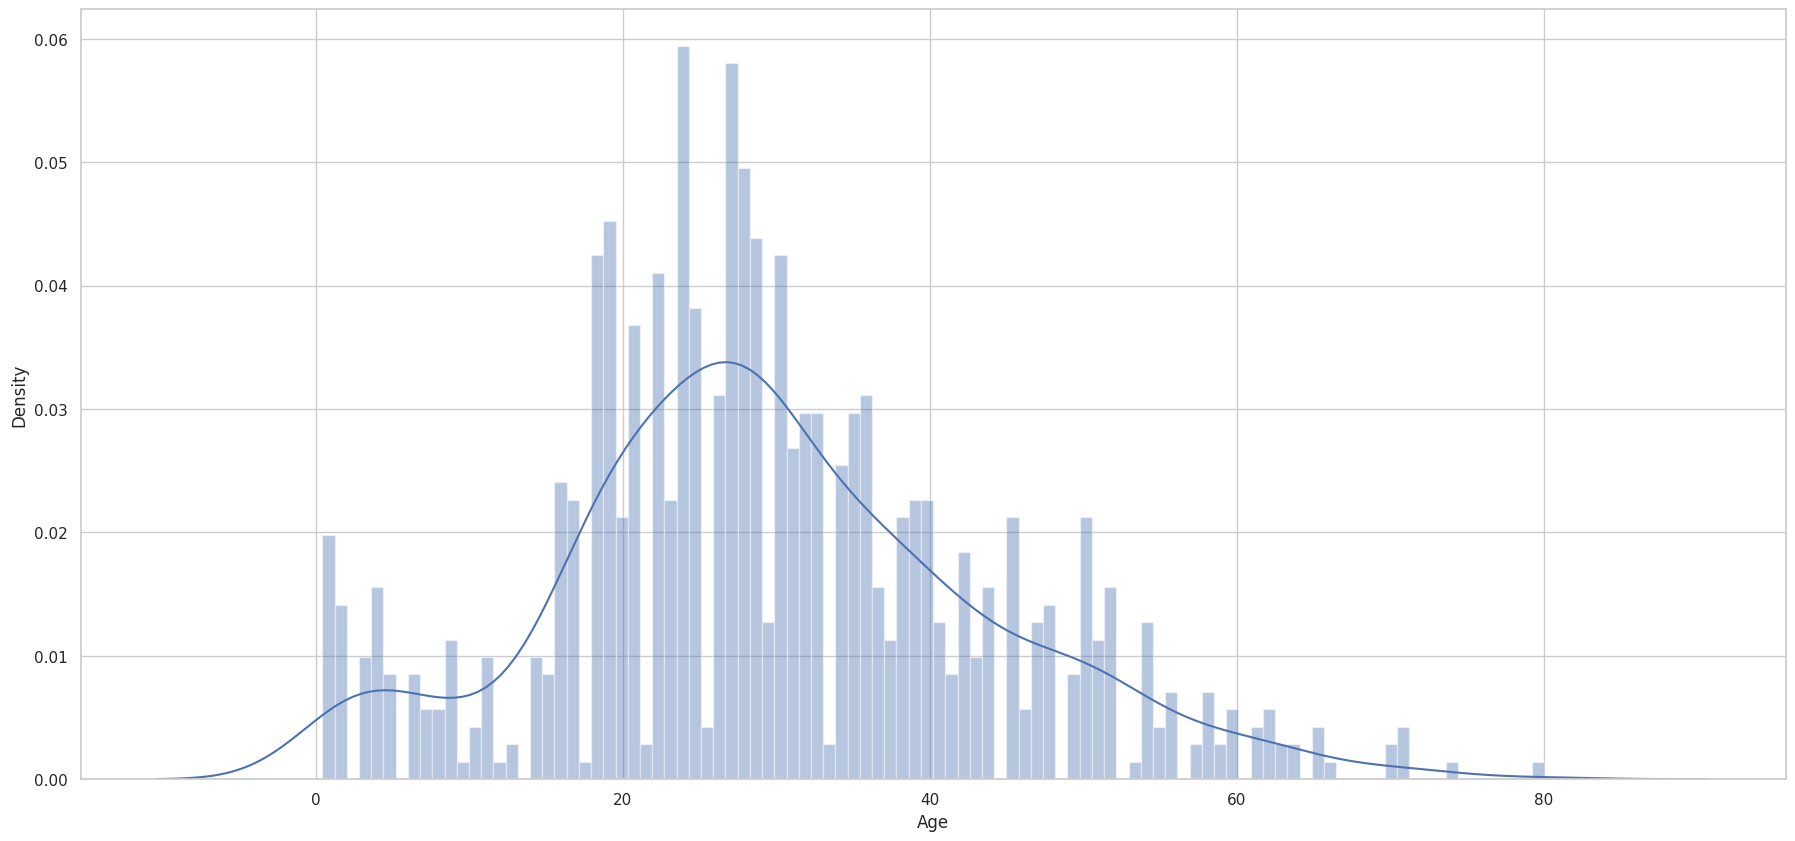

In [83]:
# we'll create a histogram for better visualization
plt.subplots(figsize=(22, 10))
sns.distplot(train.Age, bins=100, kde=True, rug=False, norm_hist=False)

**age_group**

We can create a new feature by grouping the 'Age' column


In [84]:
def age_group_fun(age):
  '''
  This function creates a bin for age
  '''
  a = ''
  if age <= 1:
    a = 'infant'
  if age <= 4:
    a = 'toddler'
  if age <= 13:
    a = 'child'
  if age <= 18:
    a = 'teenager'
  if age <= 35:
    a = 'young_adult'
  if age <= 45:
    a = 'adult'
  if age <= 55:
    a = 'middle aged'
  if age <= 65:
    a = 'senior_citizen'
  else:
    a = 'old'
  return a

train['age_group'] = train['Age'].map(age_group_fun)
test['age_group'] = test['Age'].map(age_group_fun)

# Creating dummies for 'age_group' feature
train = pd.get_dummies(train, columns=['age_group'], drop_first=True)
test = pd.get_dummies(test, columns=['age_group'], drop_first=True)


# **Part 6: Pre-Modeling Tasks**
**6a. Seperating dependant and independant variables**

Before we apply any machine learning models, It is important to separate dependent and independent variables. Our dependent variable or target variable is something that we are trying to find, and our independent variable is the features we use to find the dependent variable.


In [85]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

**6b. Splitting the training data**
*   [train_test_split](https://https://www.geeksforgeeks.org/how-to-do-train-test-split-using-sklearn-in-python/#)
*   [cross_validation](https://https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/)

 When we train the machine learning algorithms, we use part of the training set usually two-thirds of the train data. Once we train our algorithm using 2/3 of the train data, we start to test our algorithms using the remaining data. If the model performs well we dump our test data in the algorithms to predict and submit the competition.




In [86]:
# Import sklearn.model_selection above for train_test_split (Import Cell Above)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33,
                                                    random_state=0)

In [87]:
print("The length of the X_train data is: ", len(X_train))
print("The length of the X_test data is: ", len(X_test))

The length of the X_train data is:  594
The length of the X_test data is:  294


**6c. Feature Scaling**

Often times a dataset contain features highly varying in magnitude and unit. For some machine learning models, it is not a problem. However, for many other ones, its quite a problem. Many machine learning algorithms uses euclidian distances to calculate the distance between two points, it is quite a problem.


In [88]:
train.sample(5)

,Survived,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,...,nLength_group_Medium,nLength_group_Short,family_group_large,family_group_small,fare_group_High,fare_group_Low,fare_group_Mid,fare_group_Very High,fare_group_Very Low,age_group_senior_citizen
23,1,28.0,1,0,0,1,35.500000,0,0,1,...,1,0,0,1,1,0,0,0,0,1
742,1,21.0,0,2,2,0,52.475000,0,1,0,...,0,0,1,0,0,0,0,1,0,1
838,1,32.0,1,0,0,1,56.495800,0,0,1,...,0,1,0,1,0,0,0,1,0,1
361,0,29.0,1,1,0,0,13.860400,0,0,1,...,1,0,0,1,0,0,1,0,0,1
175,0,18.0,1,1,1,0,2.618067,0,0,1,...,1,0,0,1,0,0,0,0,1,1


Now we will use Standard Scaler to feature scale our dataset.

***Before Scaling***

In [89]:
headers = X_train.columns
X_train.head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,title_Mrs,...,nLength_group_Medium,nLength_group_Short,family_group_large,family_group_small,fare_group_High,fare_group_Low,fare_group_Mid,fare_group_Very High,fare_group_Very Low,age_group_senior_citizen
170,61.0000,1,0,0,1,33.5000,0,0,1,0,...,1,0,0,1,1,0,0,0,0,1
187,45.0000,1,0,0,1,26.5500,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
849,41.3025,0,1,0,0,44.5521,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1
433,17.0000,1,0,0,1,7.1250,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
651,18.0000,0,0,1,0,11.5000,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1


In [90]:
# Feature Scaling
# Using sklearn.preprocessing StandardScalar to transform (Import Cell Above)
st_scale = StandardScaler()

X_train = st_scale.fit_transform(X_train)
X_test = st_scale.transform(X_test)

*After Scaling*

In [91]:
pd.DataFrame(X_train, columns=headers).head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,title_Mrs,...,nLength_group_Medium,nLength_group_Short,family_group_large,family_group_small,fare_group_High,fare_group_Low,fare_group_Mid,fare_group_Very High,fare_group_Very Low,age_group_senior_citizen
0,2.255882,0.725942,-0.464750,-0.463616,0.794901,0.554725,-0.230633,-0.521487,0.837858,-0.383038,...,0.873276,-0.620174,-0.30317,0.30317,2.209341,-1.084354,-0.455321,-0.30317,-0.186663,0.101015
1,1.115462,0.725942,-0.464750,-0.463616,0.794901,0.292298,-0.230633,-0.521487,0.837858,-0.383038,...,-1.145113,-0.620174,-0.30317,0.30317,2.209341,-1.084354,-0.455321,-0.30317,-0.186663,0.101015
2,0.851918,-1.377520,0.356862,-0.463616,-1.258018,0.972044,-0.230633,-0.521487,-1.193520,2.610707,...,-1.145113,-0.620174,-0.30317,0.30317,2.209341,-1.084354,-0.455321,-0.30317,-0.186663,0.101015
3,-0.880273,0.725942,-0.464750,-0.463616,0.794901,-0.441176,-0.230633,-0.521487,0.837858,-0.383038,...,0.873276,-0.620174,-0.30317,0.30317,-0.452624,0.922208,-0.455321,-0.30317,-0.186663,0.101015
4,-0.808996,-1.377520,-0.464750,0.703282,-1.258018,-0.275979,-0.230633,1.917594,-1.193520,-0.383038,...,-1.145113,1.612452,-0.30317,0.30317,-0.452624,-1.084354,2.196253,-0.30317,-0.186663,0.101015


# **Part 7: Modeling the Data**

In [92]:
# Import LogisticRegression model (Import Cell Above)

# call the model object
logreg = LogisticRegression(solver='liblinear', penalty='l1', random_state=42)

# fit the model
logreg.fit(X_train, y_train)

# prediction outcome
y_pred = logreg.predict(X_test)


# Then we compare the predicted value( "y_pred") and actual
# value("test_y") to see how well our model is performing.

Evaluation of Classification Model
*   [Confusion Matrix](https://https://towardsdatascience.com/guide-to-confusion-matrices-classification-performance-metrics-a0ebfc08408e)
*   [ROC Curve](https://https://intellipaat.com/blog/roc-curve-in-machine-learning/?US)
*   [AUC curve](https://https://machine-learning.paperspace.com/wiki/auc-area-under-the-roc-curve)

We'll be using a **Confusion Matrix** for our classification model.

 For example, in terms of this dataset, our model is a **binary** one and we are trying to classify whether the passenger **survived or not survived**. we have fit the model using X_train and y_train and predicted the outcome of X_test in the variable y_pred. So, now we will use a confusion matrix to compare between y_test and y_pred.






In [93]:
print(f'y_test has a total of: {y_test.shape} data points')

y_test has a total of: (294,) data points


In [94]:
# Import sklean.metrics classification_report,
# confusion_matrix (Import Cell Above)

pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['Predicted Not-Survived', 'Predicted Survived'],
             index=['Not-Survived', 'Survived'])

,Predicted Not-Survived,Predicted Survived
Not-Survived,150,27
Survived,28,89


*   **True Positive(TP)**: values that the model predicted as yes(survived) and is actually yes(survived).
*   **True Negative(TN)**: values that model predicted as no(not-survived) and is actually no(not-survived)
*   **False Positive(FP)**: values that model predicted as yes(survived) but actually no(not-survived).
*   **False Nagative(FN)**: values that model predicted as no(not-survived) but actually yes(survived).


---
*   True Positive(TP):89
*   True Negative(TN):150
*   False Positive(FP):27
*   False Negative(FN):28








***Accuracy:*** How often our model is correct.
*   (TP + TN)/total = (87+149)/294 = .8027

We can use scikit learn to calculate the accuracy score:




In [95]:
# import sklearn.metrics accuracy score (Import Cell Above)
accuracy_score(y_test, y_pred)

0.8129251700680272

***Misclassification Rate***: The measure of how often the model is wrong
*   Misclassification Rate and Accuracy are opposed to each other
*   Misclassification is equivilent to 1 minus Accuracy
*   Misclassification Rate is also known as 'Error Rate'

*   (FP + FN)/Total = (28+30)/294 = 0.19


---



***True Positive Rate/Recall/Sensitivity***: How often the model predicts yes(survived) when it's actually yes(survived)

*   TP/(TP+FN) = 87/(87+30) = 0.7435897435897436












In [96]:
# Import sklean.metrics recall_score (Import Cell Above)
recall_score(y_test, y_pred)

0.7606837606837606

***False Positive Rate***: How often the model predicts yes(survived) when it's actually no(not-survived)?
*   FP/(FP+TN) = 28/(28+149) = 0.15819209039548024


---
***True Negative Rate/Specificity***: How often the model predicts no(not-survived) when it's actually no(not-survived)?
*   TN/(TN+FP) = 149/(149+28) = 0.8418079096045198


---
***Precision***: How often is it correct when the model predicts yes.
*   TP/(TP+FP) = 87/(87+28) = 0.7565217391304347







In [97]:
# Import sklearn.metrics precision_score (Import Cell Above)
precision_score(y_test, y_pred)

0.7672413793103449

In [98]:
# Import sklearn.metrics classification_report, balanced_accuracy_score (Import Cell Above)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       177
           1       0.77      0.76      0.76       117

    accuracy                           0.81       294
   macro avg       0.80      0.80      0.80       294
weighted avg       0.81      0.81      0.81       294



We will give our confusion matrix that we now have a bit more character:

Confusion matrix, without normalization
[[150  28]
 [ 27  89]]
Confusion matrix, without normalization
[[150  28]
 [ 27  89]]


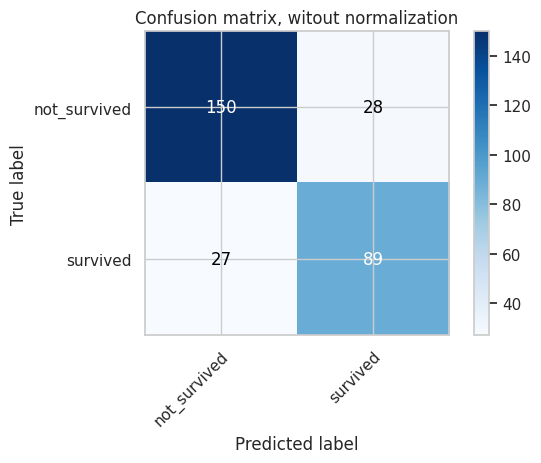

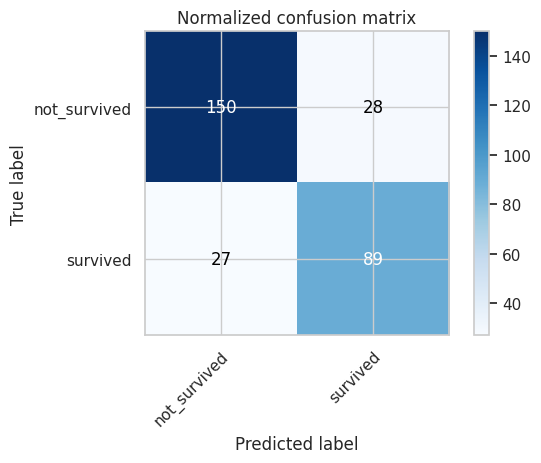

In [99]:
# Import sklearn.utilis.multiclass unique_labels (Import Cell Above)

def plot_confusion_matrix(y_pred, y_true, classes,
                          normalize=False, title=None,
                          cmap=plt.cm.Blues):
  '''
  plot_confusion_matrix -
      This function prints and plots the confusion matrix.
      Normalization can be applied by setting normalize=True
  '''
  if not title:
    if normalize:
      title = 'Normalized confusion matrix'
    else:
      title = 'Confusion matrix, without normalization'

  # Compute confusion matrix
  cm = confusion_matrix(y_true, y_pred)

  # Only use labels that appear in the data
  classes = classes[unique_labels(y_true, y_pred)]
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  fig, ax = plt.subplots()
  im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
  ax.figure.colorbar(im, ax=ax)
  ax.set(xticks=np.arange(cm.shape[1]),
         yticks=np.arange(cm.shape[0]),
         xticklabels=classes, yticklabels=classes,
         title=title,
         ylabel='True label',
         xlabel='Predicted label')
  plt.setp(ax.get_xticklabels(), rotation=45,
           ha='right', rotation_mode='anchor')

  #Loop over data dimensions and create text annotations
  fmt = '2f' if normalize else 'd'
  thresh = cm.max() / 2
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      ax.text(j, i, format(cm[i, j], fmt),
              ha='center', va='center',
              color='white' if cm[i,j] > thresh else 'black')
  fig.tight_layout()
  return ax

np.set_printoptions(precision=2)

class_names = np.array(['not_survived', 'survived'])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, witout normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Normalized confusion matrix')

plt.show()



# **AUC & ROC Corve**

<ipython-input-100-0542755b5ffe>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


0.8433048433048432


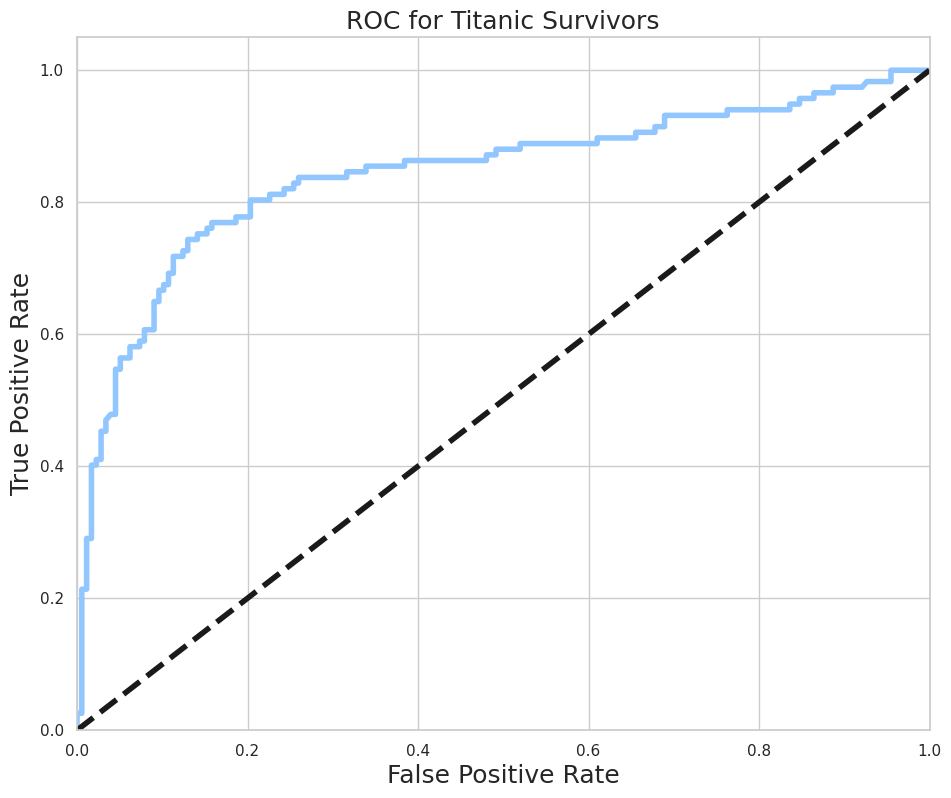

In [100]:
plt.style.use('seaborn-pastel')
# Import sklearn.metrics roc_curve, auc (Import Cell Above)

y_score = logreg.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print(ROC_AUC)

plt.figure(figsize=[11,9])
plt.plot(FPR, TPR, label='ROC curve(area = %0.2f)'%ROC_AUC, linewidth=4)
plt.plot([0,1], [0,1], "k--", linewidth=4)
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for Titanic Survivors', fontsize=18)

plt.show()

0.8118156474957692


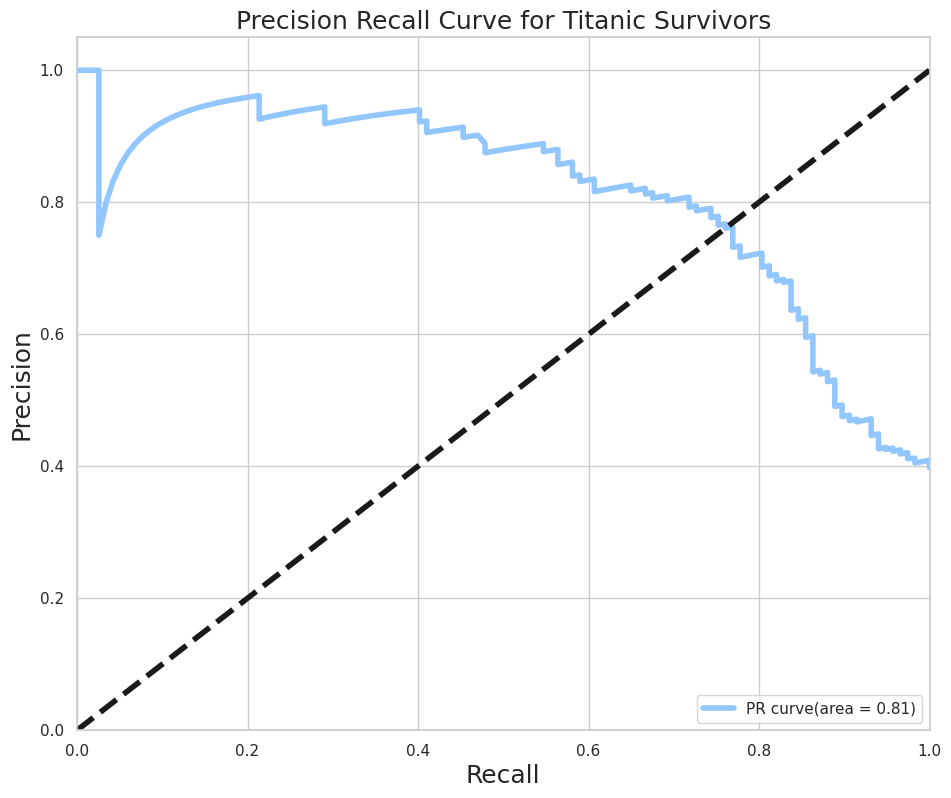

In [101]:
# Import sklearn.metrics precision_recall_curve (Import Cell Above)

y_score = logreg.decision_function(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)
print(PR_AUC)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve(area = %0.2f)'%PR_AUC, linewidth=4)
plt.plot([0,1], [0,1], "k--", linewidth=4)
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic Survivors', fontsize=18)
plt.legend(loc='lower right')

plt.show()

Using Cross-validation:
*   Helps reduce variance
*   Expends models predicability



In [102]:
sc = st_scale

In [103]:
# Import sklearn.model_selection StratifiedShuffleSplit, cross_val_score (Import Cell Above)
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=0)

# Saving feature names for decision tree display
column_names = X.columns

X = sc.fit_transform(X)
accuracies = cross_val_score(LogisticRegression(solver='liblinear'),
                             X, y, cv=cv)
print("Coss-Validation accuracy scores:{}".format(accuracies))
print("Mean Cross-Validation accuracy score:{}".format(round(accuracies.mean())
))

Coss-Validation accuracy scores:[0.82 0.83 0.82 0.85 0.85 0.82 0.82 0.86 0.83 0.82]
Mean Cross-Validation accuracy score:1


**[Grid Search](https://https://www.w3schools.com/python/python_ml_grid_search.asp) on Logistic Regression**

The word **GridSearch** stands for the fact that we are searching for optimal parameter/parameters over a "grid." These optimal parameters are also known as **Hyperparameters**. **The Hyperparameters are model parameters that are set before fitting the model and determine the behavior of the model..** For example, when we choose to use linear regression, we may decide to add a penalty to the loss function such as Ridge or Lasso. These penalties require specific alpha (the strength of the regularization technique) to set beforehand. The higher the value of alpha, the more penalty is being added. GridSearch finds the optimal value of alpha among a range of values provided by us, and then we go on and use that optimal value to fit the model and get sweet results.

Those model parameters are different from models outcomes, for example, coefficients or model evaluation metrics such as accuracy score or mean squared error are model outcomes and different than hyperparameters.


In [104]:
# Import slkearn.model_selection GridSearchCV, StratifiedKFold (Import Cell Above)

# C_vals: the alpha of lasso and ridge regression(Increasing alpha decreases model complexity)
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,
          6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]
penalties = ['l1','l2']
# Choose cross_val strategy
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25)
param = {'penalty': penalties, 'C': C_vals}
logreg = LogisticRegression(solver='liblinear')
grid = GridSearchCV(estimator=LogisticRegression(),
                    param_grid=param,
                    scoring='accuracy',
                    n_jobs=-1,
                    cv=cv)
grid.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
270 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                               4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5,
                               17, 17.5, 18],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [105]:
# Getting best of the best
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8328828828828829
{'C': 7, 'penalty': 'l2'}
LogisticRegression(C=7)


Using the best params from grid-search

In [106]:
logreg_grid = grid.best_estimator_
logreg_grid.score(X,y)

0.8378378378378378

**Confusion Matrix Underfitting & Overfitting:**

We have our first model and score. Our model may be overfitting or underfitting.
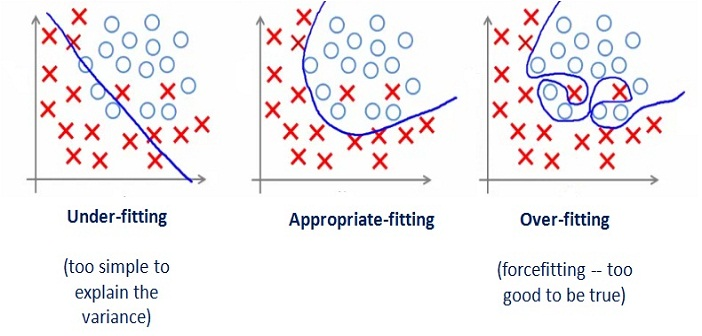

When we have a model that overfits, meaning less biased and more of variance, we introduce some bias in exchange of having much less variance. One particular tactic for this task is regularization models (Ridge, Lasso, Elastic Net). These models are built to deal with the bias-variance tradeoff.




Ideally, we want to pick a sweet spot where the model performs well in training set, validation set, and test set. As the model gets complex, bias decreases, variance increases. However, the most critical part is the error rates. We want our models to be at the bottom of that U shape where the error rate is the least. That sweet spot is also known as **Optimum Model Complexity(OMC)**.

**How to combat over-fitting?**

* Simplify the model by using less parameters.
* Simplify the model by changing the hyperparameters.
* Introducing regularization models.
* Use more training data.
* Gatter more data ( and gather better quality data).

# **7b. K-Nearest Neighbor classifier(KNN)**

In [107]:
# Import sklearn.neighbors KNeighborsClassifier (Import Cell Above)

#knn classifier works by doing euclidian distance(length of a line segment between two points)
knn = KNeighborsClassifier(metric='minkowski', p=2)

cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=2)

accuracies = cross_val_score(knn, X,y, cv = cv, scoring='accuracy')
print("Cross-Validation accuracy scores:{}".format(accuracies))
print("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),3)))

Cross-Validation accuracy scores:[0.81 0.81 0.77 0.8  0.79 0.81 0.8  0.8  0.77 0.83]
Mean Cross-Validation accuracy score: 0.799


*Manually find the best possibly value for KNN*

In [108]:
k_range = range(1,31)
k_scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')
  k_scores.append(scores.mean())
print("Mean accuracy score: {}".format(np.mean(k_scores)))
print("Accuracy scores are: {}\n".format(k_scores))

Mean accuracy score: 0.796036036036036
Accuracy scores are: [0.7423423423423423, 0.7774774774774775, 0.7837837837837839, 0.7936936936936936, 0.799099099099099, 0.7923423423423424, 0.7990990990990992, 0.7977477477477477, 0.803153153153153, 0.8022522522522522, 0.8036036036036036, 0.7972972972972971, 0.8063063063063064, 0.8004504504504505, 0.8072072072072072, 0.803153153153153, 0.8103603603603602, 0.8022522522522524, 0.805855855855856, 0.8009009009009009, 0.8009009009009009, 0.7968468468468469, 0.7986486486486486, 0.7932432432432434, 0.7972972972972973, 0.7909909909909911, 0.7981981981981983, 0.7914414414414414, 0.7968468468468468, 0.7882882882882882]



Text(0, 0.5, 'K_Scores(Acurracy Scores)')

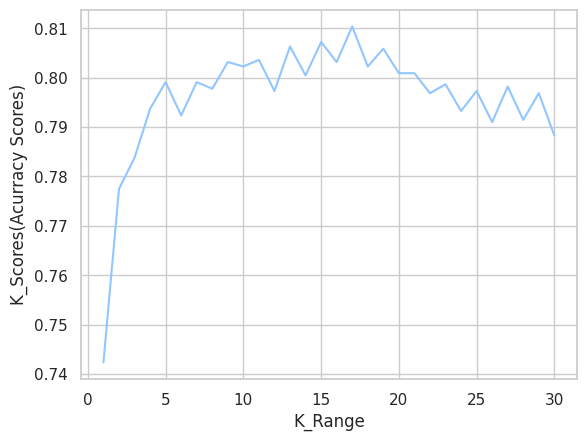

In [109]:
plt.plot(k_range, k_scores)
plt.xlabel('K_Range')
plt.ylabel('K_Scores(Acurracy Scores)')

Grid Search on KNN classifier

In [110]:
# Import sklearn.model_selection GridSearchCV (Import Cell Above)

# Trying multiple values for k
k_range = range(1,31)
weighted_options=['uniform','distance']
param = {'n_neighbors':k_range, 'weights': weighted_options}
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

'''
Using all available processors w/ scikit-learn by:
estimator=knn, param_grid=param, n_jobs=-1
'''
grid = GridSearchCV(KNeighborsClassifier(), param, cv=cv, verbose=False,
                    n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             verbose=False)

In [111]:
print('The best grid score is: ', grid.best_score_)
print('The best params are: ', grid.best_params_)
print('The best estimator is: ', grid.best_estimator_)

The best grid score is:  0.802247191011236
The best params are:  {'n_neighbors': 11, 'weights': 'uniform'}
The best estimator is:  KNeighborsClassifier(n_neighbors=11)


Using best estimator from grid search using KNN.

In [112]:
knn_grid = grid.best_estimator_
knn_grid.score(X, y)

0.8288288288288288

Using RandomizedSearchCV

Randomized search is a close cousin of grid search. It doesn't always provide the best result but its fast.


In [113]:
# Import sklearn.model_selection RandomizedSearchCV (Import Cell Above)

k_range= range(1, 31)
weighted_options = ['uniform', 'distance']
param = {'n_neighbors':k_range, 'weights':weighted_options}
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30)
grid = RandomizedSearchCV(KNeighborsClassifier(),param, cv=cv,
                          verbose=False, n_jobs=-1, n_iter=40)
grid.fit(X, y)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.3,
            train_size=None),
                   estimator=KNeighborsClassifier(), n_iter=40, n_jobs=-1,
                   param_distributions={'n_neighbors': range(1, 31),
                                        'weights': ['uniform', 'distance']},
                   verbose=False)

In [114]:
print('The best grid score is: ', grid.best_score_)
print('The best params are: ', grid.best_params_)
print('The best estimator is: ', grid.best_estimator_)

The best grid score is:  0.8
The best params are:  {'weights': 'uniform', 'n_neighbors': 17}
The best estimator is:  KNeighborsClassifier(n_neighbors=17)


In [115]:
knn_ran_grid = grid.best_estimator_
knn_ran_grid.score(X,y)

0.8209459459459459

**Gaussian Naive Bayes**

In [116]:
# Import sklearn.naive_bayes GaussianNB (Import Cell Above)

gaussian = GaussianNB()
gaussian.fit(X,y)
y_pred = gaussian.predict(X_test)
gaussian_accy = round(accuracy_score(y_pred, y_test), 3)
print('The accuracy of the Gaussian Model is: ', gaussian_accy)

The accuracy of the Gaussian Model is:  0.803


**Support Vector Machines (SVM)**


---



In [117]:
# Import sklearn.svm SVC (Import Cell Above)

# penalty parameters C for error term
Cs = [0.001, 0.01, 0.1, 1,1.5,2,2.5,3,4,5, 10]
gammas = [0.0001,0.001,0.01,0.1,1]
param_grid = {'C': Cs, 'gamma':gammas}
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

# 'rbf' stands for guassian kernel
grid_search = GridSearchCV(SVC(kernel='rbf', probability=True),
                           param_grid, cv=cv)
grid_search.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=SVC(probability=True),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1]})

In [118]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.8438202247191011
{'C': 1.5, 'gamma': 0.001}
SVC(C=1.5, gamma=0.001, probability=True)


In [119]:
# using the best found hyper-params to get the score
svm_grid = grid_search.best_estimator_
svm_grid.score(X, y)

0.8277027027027027

**Decision Tree Classifier**

Decision tree works by breaking down the dataset into small subsets. This breaking down process is done by asking questions about the features of the datasets. The idea is to unmix the labels by asking fewer questions necessary.Once we have a subgroup with only the unique type of labels, we end the tree in that node.





In [120]:
# Import sklearn.tree DecisionTreeClassifier (Import Cell Above)

max_depth = range(1, 31)
max_feature = [21,22,23,24,25,26,28,29,30,'auto']
criterion = ['entropy', 'gini']
param = {'max_depth': max_depth,
         'max_features': max_feature,
         'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(),
                    param_grid=param,
                    verbose=False,
                    cv=StratifiedKFold(n_splits=20,
                                       random_state=15,
                                       shuffle=True),
                    n_jobs=-1)
grid.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 31),
                         'max_features': [21, 22, 23, 24, 25, 26, 28, 29, 30,
                                          'auto']},
             verbose=False)

In [121]:
print( grid.best_params_)
print (grid.best_score_)
print (grid.best_estimator_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 29}
0.8368181818181817
DecisionTreeClassifier(max_depth=4, max_features=29)


In [122]:
dectree_grid = grid.best_estimator_
dectree_grid.score(X,y)

0.8502252252252253

**Feature Importance**

In [123]:
feature_importances = pd.DataFrame(dectree_grid.feature_importances_,
                                  index=column_names,columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
Sex,0.553144
Pclass_3,0.150719
calculated_fare,0.096379
SibSp,0.073018
title_Master,0.059444
Embarked_S,0.031313
Cabin_G,0.014613
Age,0.012670
Cabin_D,0.008700
nLength_group_Good,0.000000


Above: Top 10 features determined by the Decision Tree helped to classify the fates of the many passengers on the Titanic on that night.

# **7f. Random Forest Classifier**

Decision Trees provide towards building a more complex model like Random Forest(RF). RF is an ensemble method (combination of many decision trees).
 RF model takes random subsets of the original dataset(bootstrapped) and random subsets of the variables(features/columns). Using this method, the RF model creates 100's-1000's(the amount can be manually determined) of a wide variety of decision trees.

In [124]:
# Import sklearn.ensemble RandomForestClassifier (Import Cell Above)


n_estimators = [140, 145, 150, 155, 160]
max_depth = range(1, 10)
criterions = ['gini', 'entropy']
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
parameters = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'criterion': criterions}
grid = GridSearchCV(estimator=RandomForestClassifier(max_features='auto'),
                    param_grid=parameters,cv=cv,n_jobs=-1)
grid.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=RandomForestClassifier(max_features='auto'), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'n_estimators': [140, 145, 150, 155, 160]})

In [125]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8415730337078651
{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 155}
RandomForestClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       n_estimators=155)


In [126]:
rf_grid = grid.best_estimator_
rf_grid.score(X, y)

0.8434684684684685

In [127]:
print(classification_report(y_test, y_pred, labels=rf_grid.classes_))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       177
           1       0.74      0.79      0.76       117

    accuracy                           0.80       294
   macro avg       0.79      0.80      0.80       294
weighted avg       0.81      0.80      0.80       294



Feat. Importance

In [128]:
feature_importances = pd.DataFrame(rf_grid.feature_importances_,
                                  index=column_names,columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
title_Mr,0.194808
Sex,0.173439
calculated_fare,0.086175
Pclass_3,0.069590
title_Miss,0.063938
title_Mrs,0.056997
Age,0.052867
family_group_small,0.029233
Cabin_G,0.025949
family_group_large,0.022886


**Ensemble Learning**
*   *Bagging/Average Methods*:
In averaging methods, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.

*   *Boosting*:
The other family of ensemble methods are boosting methods, where base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.




# **7g. Bagging Classifier**


---
Bagging Classifier( [link text](https://https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)Bootstrap Aggregating) is the ensemble method that involves manipulating the training set by resampling and running algorithms on it.
*   Bagging classifier uses a process called bootstrapped dataset to create multiple datasets from one original dataset and runs algorithm on each one of them.
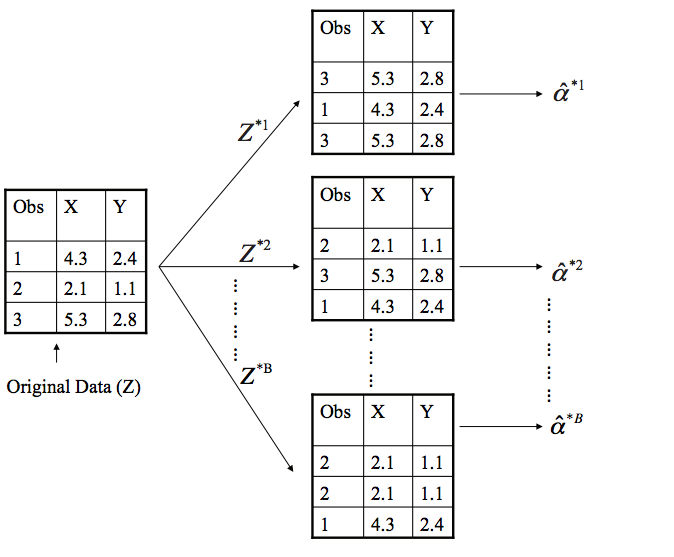









After running a learning algorithm on each one of the bootstrapped datasets, all models are combined by taking their average. the test data/new data then go through this averaged classifier/combined classifier and predict the output.

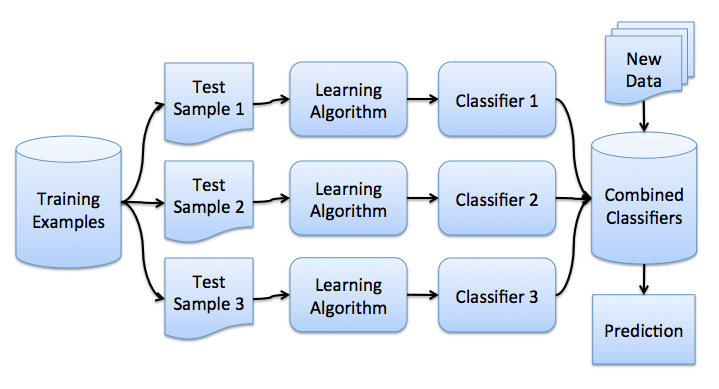

In [129]:
# Import from sklearn.ensemble BaggingClassifier (Import Cell Above)
n_estimators = [10,30,50,70,80,150,160, 170,175,180,185]
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
parameters = {'n_estimators': n_estimators}
grid = GridSearchCV(BaggingClassifier(base_estimator=None, # If None: base estimator is decisiontree
                                      bootstrap_features=False),
                                      parameters,
                                      cv=cv, n_jobs=-1)
grid.fit(X,y)



GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=BaggingClassifier(base_estimator=None), n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 160, 170,
                                          175, 180, 185]})

In [130]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8146067415730336
{'n_estimators': 80}
BaggingClassifier(base_estimator=None, n_estimators=80)


In [131]:
bagging_grid = grid.best_estimator_
bagging_grid.score(X,y)

0.9887387387387387

Bagging works best with strong and complex models(for example, fully developed decision trees). However, don't let that fool you to thinking that similar to a decision tree, bagging also overfits the model. Instead, bagging reduces overfitting since a lot of the sample training data are repeated and used to create base estimators. With a lot of equally likely training data, bagging is not very susceptible to overfitting with noisy data, therefore reduces variance. However, the downside is that this leads to an increase in bias.

# **7h. AdaBoost Classifier**

AdaBoost combines a lot of "weak learners"(they are also called stump; a tree with only one node and two leaves) to make classifications.

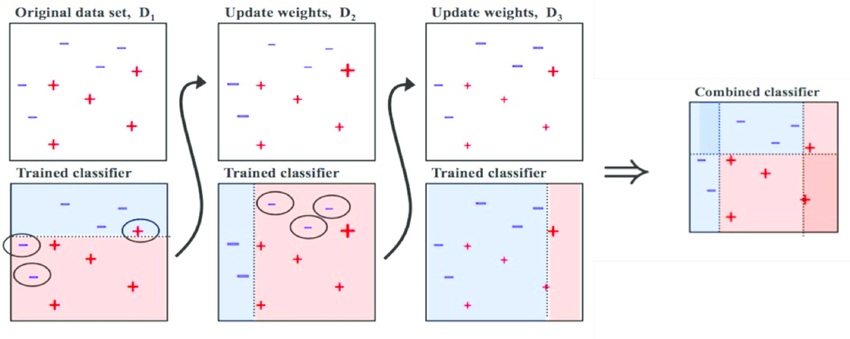


---





1. First, we determine the best feature to split the dataset using Gini index(basics from decision tree). The feature with the lowest Gini index becomes the first stump in the AdaBoost stump chain(the lower the Gini index is, the better unmixed the label is, therefore, better split).

2. Secondly, we need to determine how much say a stump will have in the final classification and how we can calculate that.
  *   We learn how much say a stump has in the final classification by calculating how well it classified the samples (aka calculate the total error of the weight).
  *   The Total Error for a stump is the sum of the weights associated with the incorrectly classified samples. For example, lets say, we start a stump with 10 datasets. The first stump will uniformly distribute an weight amoung all the datapoints. Which means each data point will have 1/10 weight.
    ϵt=misclassificationst/observationst     

    *   The total error will always be between 0(perfect stump) and 1(horrible stump).
    *   We use the total error to determine the amount of say a stump has in the final classification using the following formula.

        αt=12ln(1−ϵtϵt)where ϵt<1
        Where  ϵt is the misclassification rate for the current classifier:
        ϵt=misclassificationst/observationst

  * αt = Amount of Say
  * ϵt = Total error
  We can draw a graph to determine the amount of say using the value of total error(0 to 1):

  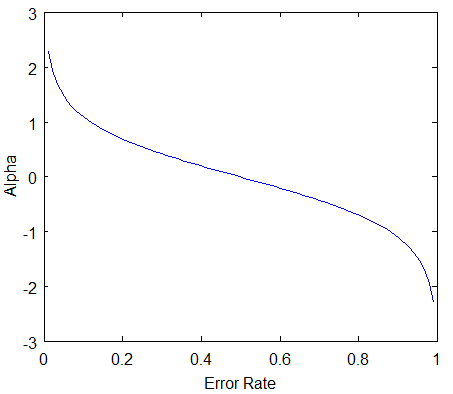

    * Blue Line: Total Error(Error Rate) between 0 and 1
      * Good: the total error is minimal, then the amount of say(Alpha) is relatively large, and the alpha value is positive.
      * Average: (similar to a coin flip/the ratio of getting correct and incorrect ~50%/50%), then the total error is ~0.5. In this case the amount of say is 0.
      * High Error/Bad: When the error rate is high let's say close to 1, then the amount of say will be negative, which means if the stump outputs a value as "survived" the included weight will turn that value into "not survived."
      
      
      If the Total Error is 1 or 0, then this equation will freak out. A small amount of error is added to prevent this from happening.


---
3. Third, We need to learn how to modify the weights so that the next stump will take the errors that the current stump made into account.

NewSampleWeight = SampleWeight + eαt

 the  αt(AmountOfSay)
  can be positive or negative depending whether the sample was correctly classified or misclassified by the current stump.

  **We want to increase the sample weight of the misclassified samples; hinting the next stump to put more emphasize on those. Inversely, we want to decrease the sample weight of the correctly classified samples**

  






The following equation help us to do this calculation.

Dt+1(i)=Dt(i)e−αtyiht(xi)

Here,

* Dt+1(i)
  = New Sample Weight.
* Dt(i)
  = Current Sample weight.
* αt
  = Amount of Say, alpha value, this is the coefficient that gets updated in each iteration and
* yiht(xi)
  = place holder for 1 if stump correctly classified, -1 if misclassified.
Finally, we put together the combined classifier, which is

AdaBoost(X)=sign(∑t=1Tαtht(X))

Here,

AdaBoost(X)
  is the classification predictions for  y
  using predictor matrix  X

T
  is the set of "weak learners"

αt
  is the contribution weight for weak learner  t

ht(X)
  is the prediction of weak learner  t

and  y
  is binary with values -1 and 1

In [132]:
# Import sklearn.ensemble AdaBoostClassifier
# n_estimators = [100,140,145,150,160, 170,175,180,185];
# cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
# learning_r = [0.1,1,0.01,0.5]

# parameters = {'n_estimators':n_estimators,'learning_rate':learning_r}
# grid = GridSearchCV(AdaBoostClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.),
                                 # param_grid=parameters,
                                 # cv=cv,
                                 # n_jobs = -1)
# grid.fit(X,y)

In [133]:
# print (grid.best_score_)
# print (grid.best_params_)
# print (grid.best_estimator_)

In [134]:
# adaBoost_grid = grid.best_estimator_
# adaBoost_grid.score(X,y)

# **7i. Gradient Boosting Classifier**

In [135]:
# Import sklearn.ensemble GradientBoostingClassifier (Import Cell Above)

gradient_boost = GradientBoostingClassifier()
gradient_boost.fit(X, y)
y_pred = gradient_boost.predict(X_test)
gradient_accy = round(accuracy_score(y_pred, y_test), 3)
print(gradient_accy)



0.867


# **7j. XGBClassifier**


---



In [136]:
# Import xgboost XGBClassifier (Import Cell Above)
XGBClassifier = XGBClassifier()
XGBClassifier.fit(X, y)
y_pred = XGBClassifier.predict(X_test)
XGBClassifier_accy = round(accuracy_score(y_pred, y_test), 3)
print(XGBClassifier_accy)

0.905


7k. Extra Trees Classifier


---



In [137]:
# Import sklearn.ensemble ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(X, y)
y_pred = ExtraTreesClassifier.predict(X_test)
extraTree_accy = round(accuracy_score(y_pred, y_test), 3)
print(extraTree_accy)


0.959


7l. Gaussian Process Classifier


---



In [138]:
# Import sklearn.gaussian_process GaussianProcessClassifier (Import Cell Above)
GPC = GaussianProcessClassifier()
GPC.fit(X, y)
y_pred = GPC.predict(X_test)
GPC_accy = round(accuracy_score(y_pred, y_test), 3)
print(GPC_accy)

0.912


# **7m. Voting Classifier**


---



In [ ]:
# Import sklearn.ensemble VotingClassifier (Import Cell Above)

voting_classifier = VotingClassifier(estimators = [
        # ('lr_grid', logred_grid),
        ('svc', svm_grid),
        ('random_forest', rf_grid),
        ('gradient_boosting', gradient_boost),
        ('decision_tree_grid', dectree_grid),
        ('knn_classifier', knn_grid),
        ('bagging_classifier', bagging_grid),
        # ('adaBoost_classifier', adaBoost_grid),
        ('ExtraTrees_Classifier', ExtraTreesClassifier),
        ('gaussian_classifier', gaussian),
        ('GPC', GaussianProcessClassifier)],
    voting='hard')

voting_classifier.fit(X, y)


In [ ]:
y_pred = voting_classifier.predict(X_test)
voting_accy = round(accuracy_score(y_pred, y_test), 3)
print(voting_accy)